### 1 - Importing pandas for dataframe and general data manipulation

In [1]:
import pandas as pd

In [6]:
pd.options.display.max_columns = 30

#

##### The data set is regarding the movie metadata for 45466 entries
##### The data was taken from TheMovieDataBase

In [7]:
df = pd.read_csv('movies_metadata.csv', low_memory= False)

In [8]:
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

##### The above indicates mixed data types for numerical quantities
##### Missing values are an issue here as well
##### Certain columns are nested JSON and stringified and these need to be adjusted to make the most of this data set.

In [10]:
df.genres[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

#
#
#

### 2 - Getting rid of irrelevant columns to make things easier

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [12]:
df.adult.value_counts()

adult
False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64

#

##### The vast majority of the films aren't adult, this column will hence be removed

In [13]:
df.drop(columns = ['adult'], inplace = True)

##### The imdb_id column is redundant, since we already have an ID column

In [14]:
df.drop(columns = ['imdb_id'], inplace = True)

In [15]:
df.drop(columns = ['original_title'], inplace = True)

In [16]:
df.drop(columns = ['video'], inplace = True)

In [17]:
df.drop(columns = ['homepage'], inplace = True)

#
#
#
### 3 - Cleaning up the stringified JSON data

In [18]:
import json

In [19]:
import ast

##### Retrieving the nested JSON columns in df and creating json_cols

In [20]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [21]:
json_cols = ['belongs_to_collection', 'genres', 'production_countries', 'production_companies', 'spoken_languages']

##### The stringified JSON data can be deserialized using the JSON package imported

##### An example:

In [22]:
json_ex = "{'dog':1, 'cat': 2}"

In [23]:
json.load(json_ex)

AttributeError: 'str' object has no attribute 'read'

##### The issue here is that double quotes were expected inside, with the single quotes outside the curly brackets

In [24]:
json_ex.replace("'", '"')

'{"dog":1, "cat": 2}'

In [25]:
json.loads(json_ex.replace("'", '"'))

{'dog': 1, 'cat': 2}

##### The above example data has been successfully destringified.
##### This same destringification must be applied to all other stringified JSON columns.
##### Lets try this out on the genres column.

In [26]:
df.genres.apply(lambda x: json.loads(x.replace("'", '"')))

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45466, dtype: object

##### Another method to do the destringification is through the ast.literal_eval() function

##### trying it out on the example we have:

In [27]:
ast.literal_eval(json_ex)

{'dog': 1, 'cat': 2}

##### Applying this to the genres column and overriding:

In [28]:
df.genres.apply(ast.literal_eval)

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45466, dtype: object

In [29]:
df.genres = df.genres.apply(ast.literal_eval)

In [30]:
df.genres[0]

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [31]:
df.loc[:, json_cols].apply(ast.literal_eval, axis= 0)

ValueError: malformed node or string: 0        {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                      NaN
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                      NaN
4        {'id': 96871, 'name': 'Father of the Bride Col...
                               ...                        
45461                                                  NaN
45462                                                  NaN
45463                                                  NaN
45464                                                  NaN
45465                                                  NaN
Name: belongs_to_collection, Length: 45466, dtype: object

##### The above error indicates mixed data types, we shall try to sort this out:

#
#
#
#
### 4 - Finding a fix for the stringified JSON:

In [32]:
import numpy as np

In [33]:
df.belongs_to_collection

0        {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                      NaN
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                      NaN
4        {'id': 96871, 'name': 'Father of the Bride Col...
                               ...                        
45461                                                  NaN
45462                                                  NaN
45463                                                  NaN
45464                                                  NaN
45465                                                  NaN
Name: belongs_to_collection, Length: 45466, dtype: object

##### literal_eval() appears to need string data and has issues for other data types.
##### A lambda if else statement that includes a string check is needed:

In [34]:
df.belongs_to_collection.apply(lambda x: isinstance(x, str)).value_counts()

belongs_to_collection
False    40972
True      4494
Name: count, dtype: int64

In [35]:
df.belongs_to_collection = df.belongs_to_collection.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [36]:
df.belongs_to_collection[0]

{'id': 10194,
 'name': 'Toy Story Collection',
 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',
 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}

##### The above method navigates around data type issues, we shall apply it to the other stringified JSON columns

In [37]:
df.spoken_languages = df.spoken_languages.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [38]:
df.production_companies = df.production_companies.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [39]:
df.production_countries = df.production_countries.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

#
#
#
#
### 5 - Flattening the previously stringified JSON data:

In [40]:
df.belongs_to_collection[0]

{'id': 10194,
 'name': 'Toy Story Collection',
 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',
 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}

##### The above indicates a dictionary with several key values that could be useful for us
##### Flattening the above dictionary will help with acquiring more relevant metadata

In [41]:
df.belongs_to_collection = df.belongs_to_collection.apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)

In [42]:
df.belongs_to_collection.value_counts()

belongs_to_collection
The Bowery Boys                  29
Totò Collection                  27
James Bond Collection            26
Zatôichi: The Blind Swordsman    26
The Carry On Collection          25
                                 ..
Glass Tiger collection            1
Kathleen Madigan Collection       1
The Big Bottom Box                1
Joséphine - Saga                  1
Red Lotus Collection              1
Name: count, Length: 1695, dtype: int64

#
##### Films can be multigenre, so we need to manipulated the genre dictionary to consolidate them into one row:

In [43]:
df.genres[0]

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [44]:
df.genres = df.genres.apply(lambda x: '|'.join(i['name'] for i in x))

In [45]:
df.genres.value_counts()

genres
Drama                              5000
Comedy                             3621
Documentary                        2723
                                   2442
Drama|Romance                      1301
                                   ... 
Action|Drama|Comedy|Documentary       1
War|Drama|History|Thriller            1
Horror|Drama|History|Thriller         1
Comedy|Crime|Action|Drama             1
Family|Animation|Romance|Comedy       1
Name: count, Length: 4069, dtype: int64

##### An empty string is present that needs to be accounted for, replacing these with np.nan will be suitable

In [46]:
df['genres'] = df['genres'].replace("", np.nan)

In [47]:
df.genres.value_counts(dropna = False).head(10)

genres
Drama                   5000
Comedy                  3621
Documentary             2723
NaN                     2442
Drama|Romance           1301
Comedy|Drama            1135
Horror                   974
Comedy|Romance           930
Comedy|Drama|Romance     593
Drama|Comedy             532
Name: count, dtype: int64

##### The empty string issue is resolved as seen above

In [48]:
df.spoken_languages

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
45461               [{'iso_639_1': 'fa', 'name': 'فارسی'}]
45462                    [{'iso_639_1': 'tl', 'name': ''}]
45463             [{'iso_639_1': 'en', 'name': 'English'}]
45464                                                   []
45465             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 45466, dtype: object

In [49]:
df.spoken_languages = df.spoken_languages.apply(lambda x: '|'.join(i['name'] for i in x) if isinstance(x, list) else np.nan)

In [50]:
df.spoken_languages.value_counts()

spoken_languages
English                           22395
                                   3952
Français                           1853
日本語                                1289
Italiano                           1218
                                  ...  
Deutsch||ελληνικά|English             1
English|suomi|Deutsch|svenska         1
English|Français|Deutsch|فارسی        1
svenska|English|Español               1
Fulfulde|English                      1
Name: count, Length: 1842, dtype: int64

In [51]:
df['spoken_languages'] = df['spoken_languages'].replace("", np.nan)

In [52]:
df.spoken_languages.value_counts(dropna = False).head(10)

spoken_languages
English             22395
NaN                  3958
Français             1853
日本語                  1289
Italiano             1218
Español               902
Pусский               807
Deutsch               762
English|Français      681
English|Español       572
Name: count, dtype: int64

In [53]:
df.production_countries

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [54]:
df.production_countries = df.production_countries.apply(lambda x: '|'.join(i['name'] for i in x) if isinstance(x, list) else np.nan)

In [55]:
df.production_countries.value_counts()

production_countries
United States of America                  17851
                                           6282
United Kingdom                             2238
France                                     1654
Japan                                      1356
                                          ...  
Romania|United Kingdom|Canada                 1
Finland|Germany|Netherlands                   1
France|Denmark|Spain|Sweden                   1
France|United States of America|Canada        1
Egypt|Italy|United States of America          1
Name: count, Length: 2390, dtype: int64

In [56]:
df['production_countries'] = df['production_countries'].replace("", np.nan)

In [57]:
df.production_countries.value_counts(dropna = False).head(10)

production_countries
United States of America    17851
NaN                          6288
United Kingdom               2238
France                       1654
Japan                        1356
Italy                        1030
Canada                        840
Germany                       749
India                         735
Russia                        735
Name: count, dtype: int64

In [58]:
df.production_companies

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45466, dtype: object

In [59]:
df.production_companies = df.production_companies.apply(lambda x: '|'.join(i['name'] for i in x) if isinstance(x, list) else np.nan)

In [60]:
df['production_companies'] = df['production_companies'].replace("", np.nan)

In [61]:
df.production_companies.value_counts(dropna = False).head(10)

production_companies
NaN                                       11881
Metro-Goldwyn-Mayer (MGM)                   742
Warner Bros.                                540
Paramount Pictures                          505
Twentieth Century Fox Film Corporation      439
Universal Pictures                          320
RKO Radio Pictures                          247
Columbia Pictures Corporation               207
Columbia Pictures                           146
Mosfilm                                     145
Name: count, dtype: int64

#
##### Comparing where we started to where we've reached in terms of missing values:


In [62]:
df.isna().sum()

belongs_to_collection    40975
budget                       0
genres                    2442
id                           0
original_language           11
overview                   954
popularity                   5
poster_path                386
production_companies     11881
production_countries      6288
release_date                87
revenue                      6
runtime                    263
spoken_languages          3958
status                      87
tagline                  25054
title                        6
vote_average                 6
vote_count                   6
dtype: int64

In [63]:
pd.read_csv('movies_metadata.csv', low_memory = False).isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

##### Appropriately, missing data was introduced to add clarity to the original data.
##### Columns like production_companies and 'spoken_languages' might have more missing data now,
##### but this takes into account the data that wasnt available and needed to be marked as such with np.nan

#
#
#
#
### 6 - Cleaning up numerical data:

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 45466 non-null  object 
 2   genres                 43024 non-null  object 
 3   id                     45466 non-null  object 
 4   original_language      45455 non-null  object 
 5   overview               44512 non-null  object 
 6   popularity             45461 non-null  object 
 7   poster_path            45080 non-null  object 
 8   production_companies   33585 non-null  object 
 9   production_countries   39178 non-null  object 
 10  release_date           45379 non-null  object 
 11  revenue                45460 non-null  float64
 12  runtime                45203 non-null  float64
 13  spoken_languages       41508 non-null  object 
 14  status                 45379 non-null  object 
 15  ta

##### Trying to convert object data type column 'budget' to float to recognize it as numerical:

In [65]:
df.budget.astype('float')

ValueError: could not convert string to float: '/ff9qCepilowshEtG2GYWwzt2bs4.jpg'

##### The above error indicates an entry having string data, which explains why df.info() indicated budget was an object datatype column

In [67]:
df.budget = pd.to_numeric(df.budget, errors = 'coerce')

##### The to_numeric() function allows us to appropriately coerce non-numeric data into NaNs

In [68]:
df.budget.value_counts(dropna = False).head(10)

budget
0.0           36573
5000000.0       286
10000000.0      259
20000000.0      243
2000000.0       242
15000000.0      226
3000000.0       223
25000000.0      206
1000000.0       197
30000000.0      190
Name: count, dtype: int64

##### The 0.0 budget is unrealistic and must be replaced with NaNs accordingly:

In [69]:
df['budget'] = df['budget'].replace(0, np.nan)

In [70]:
df.budget.value_counts(dropna = False).head(10)

budget
NaN           36576
5000000.0       286
10000000.0      259
20000000.0      243
2000000.0       242
15000000.0      226
3000000.0       223
25000000.0      206
1000000.0       197
30000000.0      190
Name: count, dtype: int64

##### The budget numbers are quite large and hard on eyes, normalizing them would be beneficial:

In [71]:
df.budget = df.budget.div(1000000)

In [72]:
df.budget.isna().sum()

36576

##### The revenue column has already been recognized as float
##### We approach it the same way we did budget and make it more legible and also account for 0s that are actually just missing values

In [73]:
df.revenue.value_counts(dropna = False).head(10)

revenue
0.0           38052
12000000.0       20
10000000.0       19
11000000.0       19
2000000.0        18
6000000.0        17
5000000.0        14
500000.0         13
8000000.0        13
1.0              12
Name: count, dtype: int64

In [74]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [75]:
df.revenue.value_counts(dropna = False).head(10)

revenue
NaN           38058
12000000.0       20
11000000.0       19
10000000.0       19
2000000.0        18
6000000.0        17
5000000.0        14
500000.0         13
8000000.0        13
1.0              12
Name: count, dtype: int64

In [76]:
df.revenue = df.revenue.div(1000000)

##### Taking into account the revenue and budget columns being divided by 1000000, the column names must reflect this appropriately:

In [77]:
df.rename(columns = {'revenue':'revenue_musd', 'budget': 'budget_musd'}, inplace = True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget_musd            8890 non-null   float64
 2   genres                 43024 non-null  object 
 3   id                     45466 non-null  object 
 4   original_language      45455 non-null  object 
 5   overview               44512 non-null  object 
 6   popularity             45461 non-null  object 
 7   poster_path            45080 non-null  object 
 8   production_companies   33585 non-null  object 
 9   production_countries   39178 non-null  object 
 10  release_date           45379 non-null  object 
 11  revenue_musd           7408 non-null   float64
 12  runtime                45203 non-null  float64
 13  spoken_languages       41508 non-null  object 
 14  status                 45379 non-null  object 
 15  ta

#
#


In [79]:
df.runtime.value_counts(dropna = False).head(10)

runtime
90.0     2556
0.0      1558
100.0    1470
95.0     1412
93.0     1214
96.0     1104
92.0     1080
94.0     1062
91.0     1057
88.0     1032
Name: count, dtype: int64

In [80]:
df['runtime'] = df['runtime'].replace(0, np.nan)

In [81]:
df.runtime.value_counts(dropna = False).head(10)

runtime
90.0     2556
NaN      1821
100.0    1470
95.0     1412
93.0     1214
96.0     1104
92.0     1080
94.0     1062
91.0     1057
88.0     1032
Name: count, dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget_musd            8890 non-null   float64
 2   genres                 43024 non-null  object 
 3   id                     45466 non-null  object 
 4   original_language      45455 non-null  object 
 5   overview               44512 non-null  object 
 6   popularity             45461 non-null  object 
 7   poster_path            45080 non-null  object 
 8   production_companies   33585 non-null  object 
 9   production_countries   39178 non-null  object 
 10  release_date           45379 non-null  object 
 11  revenue_musd           7408 non-null   float64
 12  runtime                43645 non-null  float64
 13  spoken_languages       41508 non-null  object 
 14  status                 45379 non-null  object 
 15  ta

##### The above indicates that the id column isn't numeric:

In [83]:
df.id = pd.to_numeric(df.id, errors = 'coerce')

In [84]:
df.id.value_counts()

id
141971.0    3
5511.0      2
132641.0    2
10991.0     2
168538.0    2
           ..
55135.0     1
15877.0     1
72272.0     1
1549.0      1
461257.0    1
Name: count, Length: 45433, dtype: int64

##### The id being the primary key in these table means that it shouldn't have duplicates:

In [85]:
df.duplicated(keep = False).value_counts()

False    45433
True        33
Name: count, dtype: int64

In [86]:
df[df.duplicated(keep = False)].sort_values('id')

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
7345,NaN,NaN,Crime|Drama|Thriller,5511.0,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,/cvNW8IXigbaMNo4gKEIps0NGnhA.jpg,Fida cinematografica|Compagnie Industrielle et...,France|Italy,1967-10-25,0.039481,105.0,Français,Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0
9165,NaN,NaN,Crime|Drama|Thriller,5511.0,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,/cvNW8IXigbaMNo4gKEIps0NGnhA.jpg,Fida cinematografica|Compagnie Industrielle et...,France|Italy,1967-10-25,0.039481,105.0,Français,Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0
24844,NaN,NaN,Comedy|Drama,11115.0,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,/kHaBqrrozaG7rj6GJg3sUCiM29B.jpg,Andertainment Group|Crescent City Pictures|Tag...,United States of America,2008-01-29,NaN,85.0,English,Released,NaN,Deal,5.2,22.0
14012,NaN,NaN,Comedy|Drama,11115.0,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,/kHaBqrrozaG7rj6GJg3sUCiM29B.jpg,Andertainment Group|Crescent City Pictures|Tag...,United States of America,2008-01-29,NaN,85.0,English,Released,NaN,Deal,5.2,22.0
22151,NaN,NaN,Action|Horror|Science Fiction,18440.0,en,When a comet strikes Earth and kicks up a clou...,1.436085,/tWCyKXHuSrQdLAvNeeVJBnhf1Yv.jpg,NaN,United States of America,2007-01-01,NaN,89.0,English,Released,NaN,Days of Darkness,5.0,5.0
14000,NaN,NaN,Action|Horror|Science Fiction,18440.0,en,When a comet strikes Earth and kicks up a clou...,1.436085,/tWCyKXHuSrQdLAvNeeVJBnhf1Yv.jpg,NaN,United States of America,2007-01-01,NaN,89.0,English,Released,NaN,Days of Darkness,5.0,5.0
8068,NaN,NaN,Adventure|Animation|Drama|Action|Foreign,23305.0,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,/9GlrmbZO7VGyqhaSR1utinRJz3L.jpg,Filmfour,France|Germany|India|United Kingdom,2001-09-23,NaN,86.0,हिन्दी,Released,NaN,The Warrior,6.3,15.0
9327,NaN,NaN,Adventure|Animation|Drama|Action|Foreign,23305.0,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,/9GlrmbZO7VGyqhaSR1utinRJz3L.jpg,Filmfour,France|Germany|India|United Kingdom,2001-09-23,NaN,86.0,हिन्दी,Released,NaN,The Warrior,6.3,15.0
17229,NaN,NaN,Drama,25541.0,da,Former Danish servicemen Lars and Jimmy are th...,2.587911,/q19Q5BRZpMXoNCA4OYodVozfjUh.jpg,NaN,Sweden|Denmark,2009-10-21,NaN,90.0,Dansk,Released,NaN,Brotherhood,7.1,21.0
23044,NaN,NaN,Drama,25541.0,da,Former Danish servicemen Lars and Jimmy are th...,2.587911,/q19Q5BRZpMXoNCA4OYodVozfjUh.jpg,NaN,Sweden|Denmark,2009-10-21,NaN,90.0,Dansk,Released,NaN,Brotherhood,7.1,21.0


In [87]:
df.drop_duplicates(inplace = True)

In [88]:
df.duplicated(subset = 'id', keep = False).value_counts(dropna = False)

False    45420
True        29
Name: count, dtype: int64

In [89]:
df[df.duplicated(subset = 'id', keep = False)].sort_values('id')

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
33826,NaN,30.000000,Comedy|Crime|Drama|Romance|Thriller,4912.0,en,"Television made him famous, but his biggest hi...",7.645827,/o3Im9nPLAgtlw1j2LtpMebAotSe.jpg,Miramax Films|Allied Filmmakers|Mad Chance,United States of America,2002-12-30,33.013805,113.0,English,Released,Some things are better left top secret.,Confessions of a Dangerous Mind,6.6,281.0
5865,NaN,30.000000,Comedy|Crime|Drama|Romance|Thriller,4912.0,en,"Television made him famous, but his biggest hi...",11.331072,/o3Im9nPLAgtlw1j2LtpMebAotSe.jpg,Miramax Films|Allied Filmmakers|Mad Chance,United States of America,2002-12-30,33.013805,113.0,English,Released,Some things are better left top secret.,Confessions of a Dangerous Mind,6.6,281.0
4114,Pokémon Collection,16.000000,Adventure|Fantasy|Animation|Action|Family,10991.0,ja,When Molly Hale's sadness of her father's disa...,10.264597,/5ILjS6XB5deiHop8SXPsYxXWVPE.jpg,TV Tokyo|4 Kids Entertainment|Nintendo|Pikachu...,Japan,2000-07-08,68.411275,93.0,English,Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,6.0,143.0
44821,Pokémon Collection,16.000000,Adventure|Fantasy|Animation|Action|Family,10991.0,ja,When Molly Hale's sadness of her father's disa...,6.480376,/5ILjS6XB5deiHop8SXPsYxXWVPE.jpg,TV Tokyo|4 Kids Entertainment|Nintendo|Pikachu...,Japan,2000-07-08,68.411275,93.0,English,Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,6.0,144.0
44826,Pokémon Collection,NaN,Adventure|Fantasy|Animation|Science Fiction|Fa...,12600.0,ja,"All your favorite Pokémon characters are back,...",6.080108,/bqL0PVHbQ8Jmw3Njcl38kW0CoeM.jpg,NaN,Japan|United States of America,2001-07-06,28.023563,75.0,日本語,Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,5.7,82.0
5535,Pokémon Collection,NaN,Adventure|Fantasy|Animation|Science Fiction|Fa...,12600.0,ja,"All your favorite Pokémon characters are back,...",7.072301,/bqL0PVHbQ8Jmw3Njcl38kW0CoeM.jpg,NaN,Japan|United States of America,2001-07-06,28.023563,75.0,日本語,Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,5.7,82.0
15765,NaN,0.002500,Drama|Comedy|Foreign,13209.0,fa,"Since women are banned from soccer matches, Ir...",1.529879,/nfkOkpudNNIjRrf0mTFVoiGzHyc.jpg,Jafar Panahi Film Productions,Iran,2006-05-26,NaN,93.0,فارسی,Released,NaN,Offside,6.7,27.0
11342,NaN,0.002500,Drama|Comedy|Foreign,13209.0,fa,"Since women are banned from soccer matches, Ir...",1.52896,/nfkOkpudNNIjRrf0mTFVoiGzHyc.jpg,Jafar Panahi Film Productions,Iran,2006-05-26,NaN,93.0,فارسی,Released,NaN,Offside,6.7,27.0
10419,NaN,1.600000,Drama|Crime|Mystery,14788.0,en,Set against the backdrop of a decaying Midwest...,3.185256,/w56oo9nREcF54sNXVYuE9QxZFjT.jpg,Magnolia Pictures|Extension 765,United States of America,2005-09-03,NaN,73.0,English,Released,NaN,Bubble,6.4,36.0
12066,NaN,1.600000,Drama|Crime|Mystery,14788.0,en,Set against the backdrop of a decaying Midwest...,3.008299,/w56oo9nREcF54sNXVYuE9QxZFjT.jpg,Magnolia Pictures|Extension 765,United States of America,2005-09-03,NaN,73.0,English,Released,NaN,Bubble,6.4,36.0


In [90]:
df.drop_duplicates(subset = 'id', inplace = True)

In [91]:
df.id.value_counts(dropna = False)

id
862.0       1
74458.0     1
296206.0    1
107308.0    1
16247.0     1
           ..
44399.0     1
10138.0     1
32084.0     1
42191.0     1
461257.0    1
Name: count, Length: 45434, dtype: int64

##### All the duplicate values in the id column have been accounted for!

#

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45434 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget_musd            8880 non-null   float64
 2   genres                 42992 non-null  object 
 3   id                     45433 non-null  float64
 4   original_language      45423 non-null  object 
 5   overview               44480 non-null  object 
 6   popularity             45430 non-null  object 
 7   poster_path            45048 non-null  object 
 8   production_companies   33562 non-null  object 
 9   production_countries   39151 non-null  object 
 10  release_date           45347 non-null  object 
 11  revenue_musd           7398 non-null   float64
 12  runtime                43615 non-null  float64
 13  spoken_languages       41480 non-null  object 
 14  status                 45349 non-null  object 
 15  tagline

##### The column popularity needs to be numeric as well

In [93]:
df.popularity = pd.to_numeric(df.popularity, errors = 'coerce')

In [94]:
df.popularity.value_counts(dropna = False)

popularity
0.000000    66
0.000001    56
0.000308    43
0.000220    40
0.000844    38
            ..
3.496181     1
0.665873     1
0.261949     1
1.600340     1
0.163015     1
Name: count, Length: 43746, dtype: int64

In [95]:
df['vote_count'].value_counts()

vote_count
1.0       3262
2.0       3132
0.0       2896
3.0       2782
4.0       2479
          ... 
2755.0       1
1187.0       1
4200.0       1
3322.0       1
2712.0       1
Name: count, Length: 1820, dtype: int64

##### vote_count being zero is fine.

In [96]:
df['vote_average'].value_counts()

vote_average
0.0    2995
6.0    2467
5.0    1997
7.0    1885
6.5    1722
       ... 
9.4       3
9.6       1
9.8       1
0.7       1
1.1       1
Name: count, Length: 92, dtype: int64

##### The vote_average column appears to have movies that have a zero rating.
##### In case the vote_count is 0, the vote_average has to be changed to NaN

In [97]:
df.loc[df['vote_count'] == 0, 'vote_average']

83       0.0
107      0.0
126      0.0
132      0.0
137      0.0
        ... 
45432    0.0
45434    0.0
45452    0.0
45464    0.0
45465    0.0
Name: vote_average, Length: 2896, dtype: float64

In [98]:
df.loc[df['vote_count'] == 0, 'vote_average'] = np.nan

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45434 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget_musd            8880 non-null   float64
 2   genres                 42992 non-null  object 
 3   id                     45433 non-null  float64
 4   original_language      45423 non-null  object 
 5   overview               44480 non-null  object 
 6   popularity             45430 non-null  float64
 7   poster_path            45048 non-null  object 
 8   production_companies   33562 non-null  object 
 9   production_countries   39151 non-null  object 
 10  release_date           45347 non-null  object 
 11  revenue_musd           7398 non-null   float64
 12  runtime                43615 non-null  float64
 13  spoken_languages       41480 non-null  object 
 14  status                 45349 non-null  object 
 15  tagline

##### The appropriate changes have been made in terms of data type for numerical columns that should have been numeric.

#
##### Adjusting datetime objects to be of datetime datatype.

In [100]:
df['release_date'] = pd.to_datetime(df.release_date, errors = 'coerce')

In [101]:
df.release_date.value_counts(dropna = False)

release_date
2008-01-01    136
2009-01-01    121
2007-01-01    117
2005-01-01    111
2006-01-01    101
             ... 
1941-12-31      1
1937-10-22      1
1948-07-14      1
1949-08-01      1
1917-10-21      1
Name: count, Length: 17334, dtype: int64

#
#
#
### 7 - Cleaning up string data:

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45434 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4488 non-null   object        
 1   budget_musd            8880 non-null   float64       
 2   genres                 42992 non-null  object        
 3   id                     45433 non-null  float64       
 4   original_language      45423 non-null  object        
 5   overview               44480 non-null  object        
 6   popularity             45430 non-null  float64       
 7   poster_path            45048 non-null  object        
 8   production_companies   33562 non-null  object        
 9   production_countries   39151 non-null  object        
 10  release_date           45346 non-null  datetime64[ns]
 11  revenue_musd           7398 non-null   float64       
 12  runtime                43615 non-null  float64       
 13  spoken

##### The columns original language, title, and  have not been looked at yet:

In [103]:
df.original_language.value_counts(dropna = False).head(30)

original_language
en    32251
fr     2436
it     1529
ja     1347
de     1079
es      994
ru      826
hi      508
ko      444
zh      409
sv      383
pt      316
cn      313
fi      295
nl      248
da      224
pl      219
tr      150
cs      130
el      113
no      106
fa      100
hu      100
ta       78
th       75
he       67
sr       63
ro       57
te       45
ar       39
Name: count, dtype: int64

In [104]:
df.title.value_counts(dropna = False).head(30)

title
Cinderella                       11
Alice in Wonderland               9
Hamlet                            9
Les Misérables                    8
Beauty and the Beast              8
A Christmas Carol                 7
The Three Musketeers              7
Treasure Island                   7
Heidi                             6
Mother                            6
Macbeth                           6
The Stranger                      6
Countdown                         6
The Circle                        6
Jane Eyre                         6
Bluebeard                         6
The Hound of the Baskervilles     6
Wuthering Heights                 6
The Journey                       6
First Love                        6
The Hunters                       6
Aftermath                         6
Love                              6
Home                              6
The Forest                        6
The Kiss                          5
Stranded                          5
Darling               

In [105]:
df.overview.value_counts(dropna = False).head(30)

overview
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               954
No overview found.                                                                                                                                                                                                                                                                                                                                                                                                       

##### The overview column has nearly 1000 missing values
##### Some of the entries aren't useful, like 'No overview found' and are better suited to display NaN

In [106]:
df.overview = df.overview.replace('No overview found.', np.nan)
df.overview = df.overview.replace('No Overview', np.nan)
df.overview = df.overview.replace('No movie overview available.', np.nan)
df.overview = df.overview.replace(' ', np.nan)

In [107]:
df.overview.value_counts(dropna = False).head(30)

overview
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             1102
Adaptation of the Jane Austen novel.                                                                                                                                                                                                                      

##### There might be extra overviews that dont contain apt overviews, but instead contain a variation of 'No overview found.'
##### These need to be found as well and replaced.

In [108]:
df.loc[df.overview.str.contains('overview', na=False), 'overview']

3238                                      No overview yet.
11805    Based on elements from the stories of Mark Twa...
15734    An overview of the life of the most shocking, ...
16519    Russell’s last DVD and CD, Outsourced, was tap...
18806    In 20 years, he's directed more films than Mar...
19868    An overview of the making of Terrence Malick's...
21628                                     No overview yet.
24017    This video shows how the foreign policy intere...
29780    No movie overview available, please add one at...
30352                                    No overview found
31596                                          No overview
32503    A sweeping overview of humanity’s accomplishme...
34597                                      no overview yet
39085    A documentary miniseries described by its make...
39086    David Attenborough's legendary BBC crew explai...
42398                                         No overview.
43594    An overview of the early years--late 1970s, ea.

In [109]:
df.overview = df.overview.replace('No overview yet.', np.nan)
df.overview = df.overview.replace('No overview found', np.nan)
df.overview = df.overview.replace('No overview.', np.nan)
df.overview = df.overview.replace('No plot overview available', np.nan)

In [110]:
df.overview.value_counts(dropna = False).head(30)

overview
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1107
A few funny little novels about different aspects of life.                                                                                                  

#
##### Checking the tagline column:

In [111]:
df.tagline.value_counts(dropna = False)

tagline
NaN                                                                    25033
Based on a true story.                                                     7
-                                                                          4
Be careful what you wish for.                                              4
Trust no one.                                                              4
                                                                       ...  
It's nice work - and you can get it!                                       1
A combo of scuba dupes rock up a storm in a mad pad under the surf!        1
An Adventurous Race Against Time!                                          1
This movie is bigger than all of us!                                       1
A deadly game of wits.                                                     1
Name: count, Length: 20284, dtype: int64

In [112]:
df.tagline = df.tagline.replace('-', np.nan)

In [113]:
df.tagline.value_counts(dropna = False).head(10)

tagline
NaN                                   25037
Based on a true story.                    7
Trust no one.                             4
Be careful what you wish for.             4
Drama                                     3
There is no turning back                  3
Who is John Galt?                         3
Documentary                               3
Some doors should never be opened.        3
How far would you go?                     3
Name: count, dtype: int64

#
#
#
### 8 - Dealing With Missing Values and Observations

In [114]:
df.isna().sum()

belongs_to_collection    40946
budget_musd              36554
genres                    2442
id                           1
original_language           11
overview                  1107
popularity                   4
poster_path                386
production_companies     11872
production_countries      6283
release_date                88
revenue_musd             38036
runtime                   1819
spoken_languages          3954
status                      85
tagline                  25037
title                        4
vote_average              2900
vote_count                   4
dtype: int64

##### The above indicates that there are 4 movies that don't have titles.
##### It also indicates that there one movie with a missing id.

In [115]:
df[df.title.isna()]

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
19729,NaN,NaN,Action|Thriller|Drama,82663.0,en,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,NaN,NaN,Carousel Productions|Vision View Entertainment...,NaN,104.0,Released,NaN,Midnight Man,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,Mardock Scramble Collection,NaN,Animation|Science Fiction,122662.0,ja,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,NaN,NaN,TV Movie|Action|Horror|Science Fiction,249260.0,en,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df.dropna(subset = ['id', 'title'], inplace = True)

##### The id column can now also be converted to int type

In [117]:
df.id = df.id.astype('int')

In [118]:
df.notna().sum(axis = 1)

0        18
1        18
2        17
3        18
4        18
         ..
45461    14
45462    14
45463    16
45464    12
45465    12
Length: 45430, dtype: int64

##### The above indicates the no. of columns that have dont't have missing data per row

In [119]:
df.notna().sum(axis = 1).value_counts().sort_values(ascending = False)

15    12522
16    11454
14     5424
17     4265
18     3859
13     3040
12     1890
19     1132
11     1020
10      512
9       184
8       103
7        21
6         4
Name: count, dtype: int64

##### Most of the rows tend to have a majority of their columns filled in with data
##### Let's grab the rows with 6 columns of data:

In [120]:
df[df.notna().sum(axis = 1) == 6]

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
18038,NaN,NaN,NaN,344741,pl,NaN,0.000000,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Released,NaN,Pajęczarki,NaN,0.0
20166,NaN,NaN,NaN,139909,fi,NaN,0.000127,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Released,NaN,Aurinkotuuli,NaN,0.0
41718,NaN,NaN,NaN,216550,de,NaN,0.000000,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Released,NaN,Dolpo Tulku - Heimkehr in den Himalaya,NaN,0.0
44978,NaN,NaN,NaN,398295,pt,NaN,0.000331,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Released,NaN,Mundo Cão,NaN,0.0


##### The datafram appears to have a lot of rows that have lesser than 10 valid columns with data
##### We will proceed to drop these records to clean up the data.

In [121]:
df.dropna(thresh = 10, inplace = True)

In [122]:
df.notna().sum(axis = 1).value_counts().sort_values(ascending = False)

15    12522
16    11454
14     5424
17     4265
18     3859
13     3040
12     1890
19     1132
11     1020
10      512
Name: count, dtype: int64

In [123]:
df.isna().sum()

belongs_to_collection    40631
budget_musd              36240
genres                    2149
id                           0
original_language           11
overview                   978
popularity                   0
poster_path                232
production_companies     11557
production_countries      5971
release_date                40
revenue_musd             37720
runtime                   1566
spoken_languages          3656
status                      66
tagline                  24722
title                        0
vote_average              2658
vote_count                   0
dtype: int64

#
#
#
#
### 9 - Final Cleaning Steps

In [124]:
df.status.value_counts(dropna = False)

status
Released           44691
Rumored              226
Post Production       98
NaN                   66
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

##### It would make sense to use a final dataset that only includes released movies:

In [125]:
df[df['status'] == 'Released']

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,Toy Story Collection,30.0,Animation|Comedy|Family,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Pixar Animation Studios,United States of America,1995-10-30,373.554033,81.0,English,Released,NaN,Toy Story,7.7,5415.0
1,NaN,65.0,Adventure|Fantasy|Family,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,1995-12-15,262.797249,104.0,English|Français,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,Grumpy Old Men Collection,NaN,Romance|Comedy,15602,en,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Warner Bros.|Lancaster Gate,United States of America,1995-12-22,NaN,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,NaN,16.0,Comedy|Drama|Romance,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81.452156,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,Father of the Bride Collection,NaN,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Sandollar Productions|Touchstone Pictures,United States of America,1995-02-10,76.578911,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,NaN,Drama|Family,439050,fa,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,NaN,Iran,NaT,NaN,90.0,فارسی,Released,Rising and falling between a man and woman,Subdue,4.0,1.0
45462,NaN,NaN,Drama,111109,tl,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,Sine Olivia,Philippines,2011-11-17,NaN,360.0,NaN,Released,NaN,Century of Birthing,9.0,3.0
45463,NaN,NaN,Action|Drama|Thriller,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,American World Pictures,United States of America,2003-08-01,NaN,90.0,English,Released,A deadly game of wits.,Betrayal,3.8,6.0
45464,NaN,NaN,NaN,227506,en,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,Yermoliev,Russia,1917-10-21,NaN,87.0,NaN,Released,NaN,Satan Triumphant,NaN,0.0


In [126]:
df = df[df['status'] == 'Released'].copy()

##### Now that dataframe only consists of released movies the status column becomes redundant and hence can be removed

In [127]:
df.drop(columns = ['status'], inplace = True)

##### Reordering the columns in order of their importance would make the final data set more intuitive to go through:

In [128]:
df.columns

Index(['belongs_to_collection', 'budget_musd', 'genres', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue_musd', 'runtime', 'spoken_languages', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [129]:
order = ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
      'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 'production_countries', 
        'vote_count', 'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages', 'poster_path']

In [130]:
df = df.loc[:, order]

In [131]:
df.reset_index(drop = True, inplace = True)

##### For when we do exploratory data analysis, it would be nice to have the poster to look at as well, but we see that:

In [132]:
df.poster_path[0]

'/rhIRbceoE9lR4veEXuwCC2wARtG.jpg'

##### We see that the poster path is incomplete, this can be fixed with a little string formatting with html

In [133]:
base_poster_url = 'https://image.tmdb.org/t/p/w185/'

In [134]:
base_poster_url

'https://image.tmdb.org/t/p/w185/'

In [135]:
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style = 'height:100px;'>"

In [136]:
df.poster_path[0]

"<img src='https://image.tmdb.org/t/p/w185//rhIRbceoE9lR4veEXuwCC2wARtG.jpg' style = 'height:100px;'>"

##### A final to_csv() to create a cleaned csv after all the manipulation done so far...

In [137]:
df.to_csv('movies_clean.csv', index = False)

#
#
#
#
### 10 - Making The Dataframe Larger With More Relevant Columns

In [138]:
df = pd.read_csv('movies_clean.csv', parse_dates = ['release_date'])

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [140]:
credits = pd.read_csv('credits.csv')

In [141]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [142]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


##### The id column will be used to join to the dataframe
##### Before joining however, just as was done earlier, the duplicates need to be accounted for
##### cast and crew columns are stringified JSON as well and must be corrected

In [143]:
credits[credits.duplicated(subset = ['id'], keep = False)].sort_values('id')

,cast,crew,id
25885,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
25950,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
33838,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760a9', 'de...",4912
5865,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760b5', 'de...",4912
9165,"[{'cast_id': 11, 'character': 'Jef Costello', ...","[{'credit_id': '52fe440ac3a36847f807ee01', 'de...",5511
...,...,...,...
25887,"[{'cast_id': 7, 'character': 'Hollander', 'cre...","[{'credit_id': '52fe4da29251416c9111ce5d', 'de...",199591
24163,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189
45275,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189
33196,"[{'cast_id': 1, 'character': 'Jenjira', 'credi...","[{'credit_id': '5448c8efc3a3680fb4001582', 'de...",298721


In [144]:
credits.drop_duplicates(subset = 'id', inplace = True)

In [145]:
credits.id.value_counts(dropna = False)

id
862       1
74458     1
296206    1
107308    1
16247     1
         ..
32985     1
44399     1
10138     1
32084     1
461257    1
Name: count, Length: 45432, dtype: int64

#
##### Before joining it would be nice to check for whether there are any movies in the original data fram that don't share the same id as in the credits dataframe

In [146]:
df[~df.id.isin(credits.id)]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path


##### It can be checked the other way around as well

In [147]:
credits[~credits.id.isin(df.id)]

,cast,crew,id
189,"[{'cast_id': 4, 'character': 'Himself', 'credi...",[],56088
554,"[{'cast_id': 3, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4e4dc3a368484e21952d', 'de...",218473
682,"[{'cast_id': 2, 'character': 'Eunice', 'credit...","[{'credit_id': '52fe475cc3a36847f81317f7', 'de...",48260
685,"[{'cast_id': 0, 'character': 'James Bird', 'cr...","[{'credit_id': '57a321c6c3a3683fa70013d8', 'de...",277270
711,[],[],365371
...,...,...,...
45320,"[{'cast_id': 0, 'character': 'Mała metalowa dz...","[{'credit_id': '57ee6832c3a3682a2d003ccd', 'de...",418757
45323,"[{'cast_id': 0, 'character': 'Krzysiek Buk', '...","[{'credit_id': '564fd6a59251414b01005a8a', 'de...",369444
45348,[],[],335251
45420,"[{'cast_id': 1, 'character': 'Aprel', 'credit_...","[{'credit_id': '58d83051c3a368126f0567fe', 'de...",449131


##### It seems that the other way around, the movies in the credits data don't appear to match with anything in df
##### This is because of the removal of data conducted on the original metadata df
##### Now the two dataframe should be merged

In [148]:
df = df.merge(credits, how = 'left', left_on = 'id', right_on = 'id')

In [149]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,crew
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='https://image.tmdb.org/t/p/w185//rhI...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='https://image.tmdb.org/t/p/w185//vzm...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='https://image.tmdb.org/t/p/w185//6ks...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='https://image.tmdb.org/t/p/w185//16X...,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='https://image.tmdb.org/t/p/w185//e64...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,Iran,1.0,4.0,0.072051,90.0,Rising and falling between a man and woman.,فارسی,<img src='https://image.tmdb.org/t/p/w185//jld...,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de..."
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3.0,9.0,0.178241,360.0,An artist struggles to finish his work while a...,NaN,<img src='https://image.tmdb.org/t/p/w185//xZk...,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,6.0,3.8,0.903007,90.0,"When one of her hits goes wrong, a professiona...",English,<img src='https://image.tmdb.org/t/p/w185//d5b...,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de..."
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,Russia,0.0,NaN,0.003503,87.0,"In a small town live two brothers, one a minis...",NaN,<img src='https://image.tmdb.org/t/p/w185//aor...,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de..."


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

#####  The cast and crew columns have been successfully added into df

#
#
#
### 11 - Cleaning Up The Newly Added Columns
### 11.1 - Cleaning Up The Cast Column

In [151]:
df.cast[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [152]:
df.cast[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

##### Applying the ast.literal_eval() lambda function from earlier:

In [153]:
df.cast = df.cast.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [154]:
df.cast[0]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [155]:
df['cast_size'] = df.cast.apply(lambda x: len(x))

In [156]:
df.cast_size.value_counts(dropna = False).head(20)

cast_size
10    2770
8     2729
7     2710
6     2649
5     2637
9     2557
15    2444
4     2406
11    2283
0     2189
12    2043
13    1799
14    1578
16    1350
1     1302
17    1103
3     1087
2      882
18     811
19     785
Name: count, dtype: int64

In [157]:
df.cast = df.cast.apply(lambda x: '|'.join(i['name'] for i in x) if isinstance(x, list) else np.nan)

In [158]:
df.cast[0]

'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'

In [159]:
df.cast.value_counts(dropna = False).head(30)

cast
                      2189
Georges Méliès          24
Louis Theroux           15
Mel Blanc               12
Jimmy Carr               9
George Carlin            8
Louis C.K.               8
David Attenborough       8
Werner Herzog            8
Patton Oswalt            6
Jim Jefferies            6
Ricky Gervais            6
Trevor Noah              6
Doug Stanhope            6
Lewis Black              5
Bill Burr                5
Dylan Moran              5
Bill Maher               5
Kenneth Branagh          5
Eddie Izzard             5
Jim Gaffigan             5
Russell Brand            4
Bill Hicks               4
Hannibal Buress          4
John Pilger              4
Robin Williams           4
Lisa Lampanelli          4
Don Hertzfeldt           4
Walt Disney              4
Jeff Dunham              4
Name: count, dtype: int64

In [160]:
df.cast = df.cast.replace('', np.nan)

In [161]:
df.cast.value_counts(dropna = False)

cast
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         2189
Georges Méliès                                                                                                                                                                                                                                                                    

#
#
#
### 11.2 - Cleaning Up The Crew Column

In [162]:
df.crew = df.crew.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [163]:
df.crew[0]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

##### Getting the crew size per film:

In [164]:
df['crew_size'] = df.crew.apply(lambda x: len(x))

In [165]:
df.crew_size.value_counts(dropna = False).head(30)

crew_size
2     6197
3     4951
1     4866
4     3064
5     2240
7     1968
10    1928
6     1867
8     1864
9     1686
11    1555
12    1388
13    1181
14    1017
15     854
16     746
17     633
0      620
18     541
19     420
20     358
21     349
22     287
24     252
23     251
25     220
28     198
26     183
27     174
31     133
Name: count, dtype: int64

##### Creating a function for extracting the director per film:

In [166]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [167]:
df['director'] = df.crew.apply(get_director)

In [168]:
df.director.value_counts(dropna = False).head(30)

director
NaN                   731
John Ford              66
Michael Curtiz         65
Werner Herzog          54
Alfred Hitchcock       53
Georges Méliès         49
Woody Allen            49
Jean-Luc Godard        46
Sidney Lumet           46
Charlie Chaplin        44
Raoul Walsh            43
William A. Wellman     42
Henry Hathaway         41
Richard Thorpe         40
Martin Scorsese        39
Ingmar Bergman         39
Fritz Lang             38
John Huston            38
George Cukor           38
Mervyn LeRoy           37
Robert Altman          37
Robert Wise            36
Takashi Miike          35
Frank Capra            35
J. Lee Thompson        35
Clint Eastwood         35
Joseph Sargent         35
Richard Fleischer      35
Roger Corman           35
Claude Chabrol         35
Name: count, dtype: int64

##### Creating a function for extracting the film scorer:

In [169]:
def get_scorer(x):
    for i in x:
        if i['job'] == 'Music':
            return i['name']
    return np.nan

In [170]:
df['musical_score'] = df.crew.apply(get_scorer)

In [171]:
df.musical_score.value_counts(dropna = False).head(30)

musical_score
NaN                        38498
Ennio Morricone               31
Mark Isham                    28
John Debney                   26
Theodore Shapiro              22
Alan Silvestri                20
Christopher Young             18
Rachel Portman                17
Kenji Kawai                   16
Pritam Chakraborty            16
Bruno Coulais                 16
Brian Tyler                   16
Marco Beltrami                16
William Axt                   15
A. R. Rahman                  15
Carter Burwell                15
Angelo Badalamenti            15
Hans Zimmer                   15
Michael Richard Plowman       14
Graeme Revell                 14
David Newman                  14
Klaus Badelt                  14
Herbert Stothart              13
Alexandre Desplat             13
Riz Ortolani                  13
Tyler Bates                   13
Hugo Friedhofer               13
Bill Conti                    12
Danny Elfman                  12
Pino Donaggio                

##### Creating a function for extracting the Executive producer per film:

In [172]:
def get_producer(x):
    for i in x:
        if i['job'] == 'Executive Producer':
            return i['name']
    return np.nan

In [173]:
df['producer'] = df.crew.apply(get_producer)

In [174]:
df.producer.value_counts(dropna = False).head(30)

producer
NaN                     36367
Bob Weinstein              64
Roger Corman               54
Hal B. Wallis              52
Bruce Berman               49
John Lasseter              44
Darryl F. Zanuck           42
Samuel Z. Arkoff           40
Jack Warner                36
Charles Band               33
David Rimawi               31
Steven Spielberg           29
Michael Uslan              24
Arnon Milchan              21
Tessa Ross                 21
Stan Lee                   20
George Lucas               19
Peter Aalbæk Jensen        17
Francis Ford Coppola       17
David M. Thompson          17
Brian Volk-Weiss           17
Mario Kassar               17
Dino De Laurentiis         16
Michael Carreras           16
Boaz Davidson              16
Walter Mirisch             15
Avi Lerner                 15
Charles H. Joffe           14
Tim Bevan                  14
Jack L. Warner             14
Name: count, dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

##### Dropping the crew column as we've extracted everything required:

In [176]:
df.drop(columns = ['crew'], inplace = True)

In [177]:
df.to_csv('movies_final.csv', index = False)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

#
#
#
#
### 12 - Exploration Of The Data:

##### A look at the numerical stats for the movies data:

In [179]:
df.describe()

,id,release_date,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.000000,44657,8854.000000,7385.000000,44691.000000,42077.000000,44691.000000,43179.000000,44691.000000,44691.000000
mean,107186.242845,1992-04-28 16:30:02.539355520,21.669886,68.968649,111.653778,6.003341,2.957460,97.566850,12.479090,10.313643
min,2.000000,1874-12-09 00:00:00,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,26033.500000,1978-08-12 00:00:00,2.000000,2.405420,3.000000,5.300000,0.402038,86.000000,6.000000,2.000000
50%,59110.000000,2001-08-16 00:00:00,8.200000,16.872671,10.000000,6.100000,1.150055,95.000000,10.000000,6.000000
75%,154251.000000,2010-12-10 00:00:00,25.000000,67.642693,35.000000,6.800000,3.768882,107.000000,15.000000,12.000000
max,469172.000000,2017-12-27 00:00:00,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000,435.000000
std,111806.362236,NaN,34.359837,146.608966,495.322313,1.281060,6.040008,34.653409,12.124663,15.892154


##### Visualizing this through will give us an intuitive first glance:

##### Importing matplotlib for data visualization:

In [180]:
import matplotlib.pyplot as plt

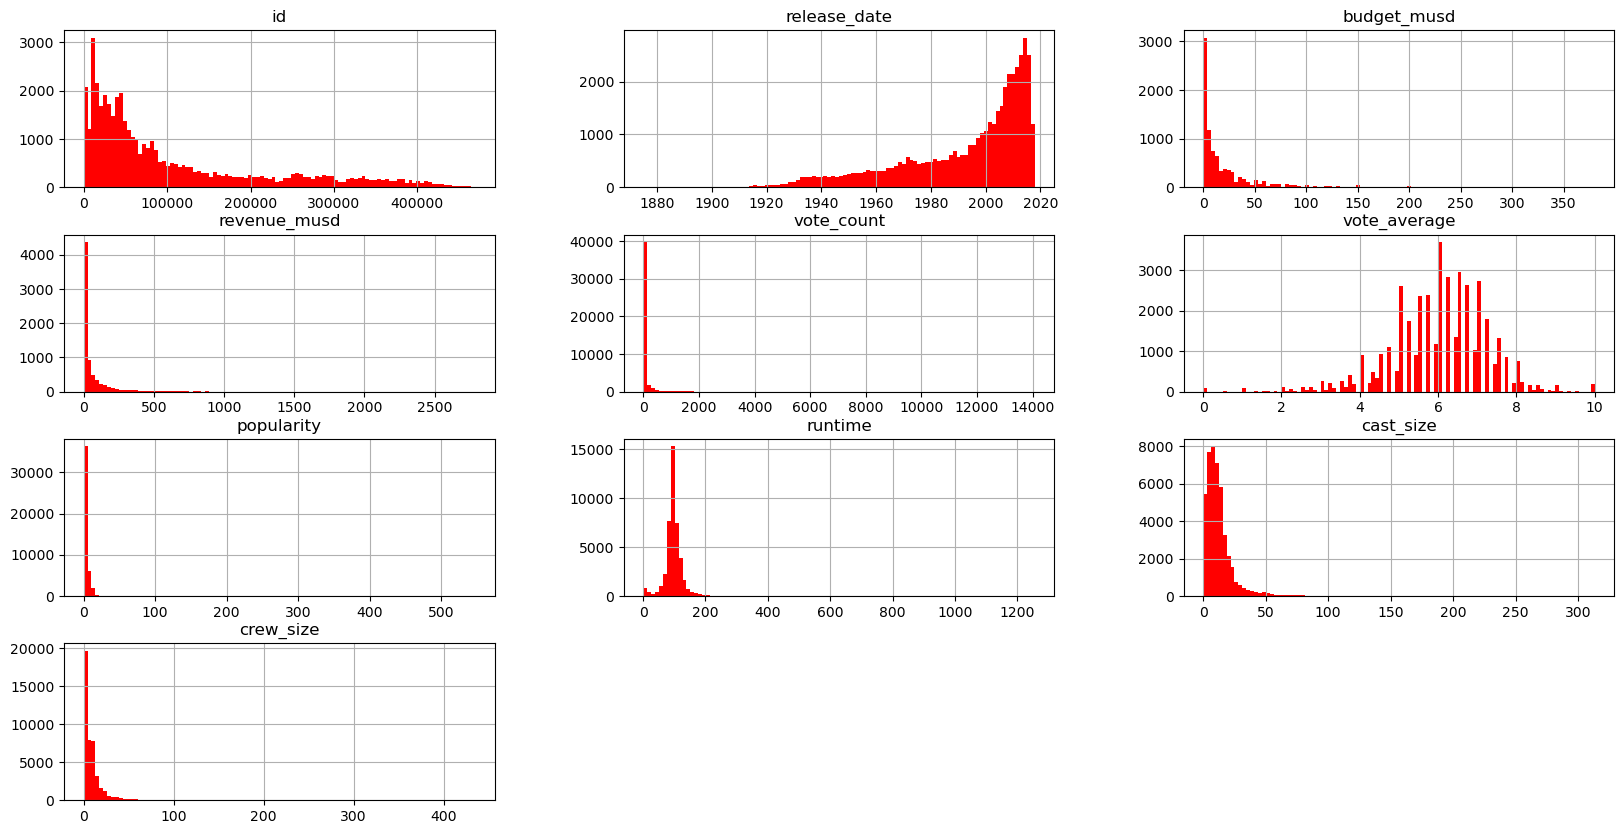

In [181]:
df.hist(figsize = (20, 10), bins = 100, color = 'red')
plt.show()

##### The above visualization makes things easier to understand at a glance
##### -> budget seems to be more heavily distributed in the low 10s of millions with large outliers in the 100s of millions
##### -> release dates seem to be more dense tending towards the turn of the century, with the 2010s taking the peak
##### -> movie runtime seems to be have more datapoints distributed around the 100 minute mark

#
#

##### A look at the stats for object data as well:

In [182]:
df.describe(include = 'O')

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director,musical_score,producer
count,44691,20284,42586,4463,44681,33356,38835,43739,41094,44467,42502,43960,6193,8324
unique,41605,20171,4044,1691,89,22537,2377,43714,1828,44442,42166,17349,3485,4902
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='https://image.tmdb.org/t/p/w185//5D7...,Georges Méliès,John Ford,Ennio Morricone,Bob Weinstein
freq,11,7,4935,29,31755,741,17723,3,22189,5,24,66,31,64


In [183]:
df[df.title == 'Cinderella']

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,musical_score,producer
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.9,263.591415,RKO Radio Pictures|Walt Disney Productions,United States of America,1760.0,6.8,14.436858,74.0,Cinderella has faith her dreams of a better li...,English,<img src='https://image.tmdb.org/t/p/w185//cdf...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi,NaN,NaN
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,NaN,NaN,Walt Disney Television|Citadel Entertainment|S...,United States of America,28.0,6.1,2.102013,88.0,Updated version of the classic Rodgers and Ham...,English,<img src='https://image.tmdb.org/t/p/w185//s5d...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove,NaN,NaN
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,NaN,NaN,NaN,United States of America,7.0,5.4,0.361288,52.0,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='https://image.tmdb.org/t/p/w185//2cL...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood,NaN,NaN
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,NaN,NaN,GoodTimes Entertainment,Japan|United States of America,2.0,6.0,2.154873,48.0,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='https://image.tmdb.org/t/p/w185//rbz...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma,NaN,NaN
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,NaN,NaN,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,Italy,9.0,5.3,0.987462,180.0,Once upon a time in post-war Rome: 13-year old...,English,<img src='https://image.tmdb.org/t/p/w185//yKL...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay,NaN,NaN
28340,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.0,543.514353,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,United Kingdom|United States of America,2426.0,6.7,19.801128,105.0,"When her father unexpectedly passes away, youn...",English,<img src='https://image.tmdb.org/t/p/w185//o1F...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh,NaN,Barry H. Waldman
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,NaN,NaN,Lenfilm,Russia,5.0,4.8,0.486073,80.0,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='https://image.tmdb.org/t/p/w185//nLR...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova,NaN,NaN
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,NaN,NaN,NaN,United States of America,5.0,5.9,0.209552,77.0,The first of three TV-versions of the classic ...,English,<img src='https://image.tmdb.org/t/p/w185//4Tj...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson,Alfredo Antonini,NaN
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,NaN,NaN,NaN,NaN,5.0,5.6,1.085134,90.0,Cinderella (named Zezolla) and her family live...,English,<img src='https://image.tmdb.org/t/p/w185//fst...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron,Jaz Coleman,NaN
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,NaN,NaN,Star-Film|Georges Méliès,France,19.0,5.5,1.301063,5.0,A fairy godmother magically turns Cinderella's...,No Language,<img src='https://image.tmdb.org/t/p/w185//vtY...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès,NaN,NaN


In [184]:
df[df.title == 'Cinderella'].release_date.value_counts()

release_date
1950-03-04    1
1997-11-02    1
1914-12-28    1
2002-08-06    1
2011-10-30    1
2015-03-12    1
1947-11-28    1
1957-03-31    1
2000-01-01    1
1899-10-01    1
2012-02-14    1
Name: count, dtype: int64

##### The Cinderellas appear to be unique releases spanning from as early back as 1900s to as recently as 2012, with its first release in 1899

##### Creating another dataframe for the best movies:

In [185]:
df_top = df[['title', 'budget_musd', 'revenue_musd', 'vote_count', 'vote_average', 'popularity']].copy()

In [186]:
df_top

,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,Toy Story,30.0,373.554033,5415.0,7.7,21.946943
1,Jumanji,65.0,262.797249,2413.0,6.9,17.015539
2,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900
3,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495
4,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519
...,...,...,...,...,...,...
44686,Subdue,NaN,NaN,1.0,4.0,0.072051
44687,Century of Birthing,NaN,NaN,3.0,9.0,0.178241
44688,Betrayal,NaN,NaN,6.0,3.8,0.903007
44689,Satan Triumphant,NaN,NaN,0.0,NaN,0.003503


##### Lets add new columns
##### 'profit_musd' for profit
##### 'return' for a ROI ratio

In [187]:
df_top['profit_musd'] = df['revenue_musd'] - df['budget_musd']

In [188]:
df_top['return'] = df['revenue_musd'] / df['budget_musd']

In [189]:
df_top[['profit_musd', 'return']]

,profit_musd,return
0,343.554033,12.451801
1,197.797249,4.043035
2,NaN,NaN
3,65.452156,5.090760
4,NaN,NaN
...,...,...
44686,NaN,NaN
44687,NaN,NaN
44688,NaN,NaN
44689,NaN,NaN


##### For data presentation purposes the column headers will be changed:

In [190]:
df_top.columns = [ 'Title', 'Budget', 'Revenue', 'Votes', 'Average Rating', 'Popularity', 'Profit', 'ROI']

In [191]:
df_top.columns

Index(['Title', 'Budget', 'Revenue', 'Votes', 'Average Rating', 'Popularity',
       'Profit', 'ROI'],
      dtype='object')

##### Setting the Title column to be our index

In [192]:
df_top.set_index('Title', inplace = True)

In [193]:
df_top

,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,
Toy Story,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
Jumanji,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN
...,...,...,...,...,...,...,...
Subdue,NaN,NaN,1.0,4.0,0.072051,NaN,NaN
Century of Birthing,NaN,NaN,3.0,9.0,0.178241,NaN,NaN
Betrayal,NaN,NaN,6.0,3.8,0.903007,NaN,NaN


##### To get the best and worst movies in terms of ratings, ROI, etc.., outliers need to be filtered out
##### A straight forward application of sort_values() isn't particularly useful due to the obvious outliers, case in point, the below cell:

In [194]:
df_top.sort_values('ROI', ascending = False)

,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,
Less Than Zero,0.000001,12.396383,77.0,6.1,4.028679,12.396382,1.239638e+07
Modern Times,0.000001,8.500000,881.0,8.1,8.159556,8.499999,8.500000e+06
Welcome to Dongmakgol,0.000008,33.579813,49.0,7.7,4.222195,33.579805,4.197477e+06
Aquí Entre Nos,0.000001,2.755584,3.0,6.0,0.230075,2.755583,2.755584e+06
"The Karate Kid, Part II",0.000113,115.103979,457.0,5.9,9.231318,115.103866,1.018619e+06
...,...,...,...,...,...,...,...
Subdue,NaN,NaN,1.0,4.0,0.072051,NaN,NaN
Century of Birthing,NaN,NaN,3.0,9.0,0.178241,NaN,NaN
Betrayal,NaN,NaN,6.0,3.8,0.903007,NaN,NaN


##### In the above result set, ROI seems stratospheric in terms of how much gains have been made
##### These extreme cases are proven outliers by nature of their budget, with the title 'Less Than Zero' operating on a near zero budget
##### This is also the case when looking at Ratings

In [195]:
df_top.sort_values('Average Rating', ascending = False)

,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,
Portrait of a Young Man in Three Movements,NaN,NaN,1.0,10.0,0.036471,NaN,NaN
Brave Revolutionary,NaN,NaN,1.0,10.0,0.318826,NaN,NaN
Other Voices Other Rooms,NaN,NaN,1.0,10.0,0.036680,NaN,NaN
The Lion of Thebes,NaN,NaN,1.0,10.0,1.783625,NaN,NaN
Katt Williams: Priceless: Afterlife,NaN,NaN,2.0,10.0,0.476007,NaN,NaN
...,...,...,...,...,...,...,...
Altar of Fire,NaN,NaN,0.0,NaN,0.000000,NaN,NaN
The Wonders of Aladdin,NaN,NaN,0.0,NaN,0.093498,NaN,NaN
Deep Hearts,NaN,NaN,0.0,NaN,0.011025,NaN,NaN


#####  Removing these outliers can be done by adding filters for minimum budget, votes, etc...

In [196]:
df_top['Budget'] = df_top['Budget'].fillna(0)

In [197]:
df_top['Votes'] = df_top['Votes'].fillna(0)

In [198]:
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Budget          44691 non-null  float64
 1   Revenue         7385 non-null   float64
 2   Votes           44691 non-null  float64
 3   Average Rating  42077 non-null  float64
 4   Popularity      44691 non-null  float64
 5   Profit          5371 non-null   float64
 6   ROI             5371 non-null   float64
dtypes: float64(7)
memory usage: 2.7+ MB


##### Defining a function to:
##### Return a subset of the df_top dataset after filtering and sorting by key metrics indicating success and acclaim

In [199]:
def best_worst(n, by, ascending = False, min_bud = 0, min_votes = 0):
    
    df1 = df_top.loc[(df_top.Budget >= min_bud) & (df_top.Votes >= min_votes), [by]].sort_values(by, ascending = ascending).head(n).copy()
    
    return df1

##### Utilizing the above function for getting the best and worst performing films

##### 12.1 - The top 5 movies by Revenue

In [200]:
best_worst(5, 'Revenue')

,Revenue
Title,
Avatar,2787.965087
Star Wars: The Force Awakens,2068.223624
Titanic,1845.034188
The Avengers,1519.557910
Jurassic World,1513.528810


##### 12.2 - The top 5 movies by Budget

In [201]:
best_worst(5, 'Budget')

,Budget
Title,
Pirates of the Caribbean: On Stranger Tides,380.0
Pirates of the Caribbean: At World's End,300.0
Avengers: Age of Ultron,280.0
Superman Returns,270.0
Transformers: The Last Knight,260.0


##### 12.3 - The top 5 movies by profit

In [202]:
best_worst(5, 'Profit')

,Profit
Title,
Avatar,2550.965087
Star Wars: The Force Awakens,1823.223624
Titanic,1645.034188
Jurassic World,1363.528810
Furious 7,1316.249360


##### 12.4 - The top 5 worst movies by losses incurred

In [203]:
best_worst(5, 'Profit', ascending = True)

,Profit
Title,
The Lone Ranger,-165.710090
The Alamo,-119.180039
Mars Needs Moms,-111.007242
Valerian and the City of a Thousand Planets,-107.447384
The 13th Warrior,-98.301101


##### 12.5 - The top 5 movies by highest ROI above a budget of 5 million dollars

In [204]:
best_worst(5, 'ROI', min_bud = 5)

,ROI
Title,
E.T. the Extra-Terrestrial,75.520507
My Big Fat Greek Wedding,73.748809
Star Wars,70.490728
Jaws,67.236286
Crocodile Dundee,65.640701


##### 12.6 - The top 5 movies by highest ROI above a budget of 25 million dollars

In [205]:
best_worst(5, 'ROI', min_bud = 25)

,ROI
Title,
The Passion of the Christ,20.396647
Aladdin,18.001794
Return of the Jedi,17.703246
Mrs. Doubtfire,17.651448
The Lion King,17.516484


##### 12.7 - The top 5 movies by lowest ROI above a budget of 5 million dollars

In [206]:
pd.options.display.float_format = '{:.6f}'.format

##### The above options.display tweak helps to eliminate scientific notation for really small numbers that might be displayed

In [207]:
best_worst(5, 'ROI', ascending = True, min_bud = 5)

,ROI
Title,
Chasing Liberty,0.000001
The Cookout,0.000001
Never Talk to Strangers,0.000001
Deadfall,0.000002
In the Cut,0.000002


##### 12.8 - The top 5 movies by lowest ROI above a budget of 50 million dollars

In [208]:
best_worst(5, 'ROI', ascending = True, min_bud = 50)

,ROI
Title,
Foodfight!,0.001134
Metropolis,0.007022
Lolita,0.017098
Child 44,0.066487
The Adventures of Pluto Nash,0.071040


##### 12.9 - The top 5 movies by number of votes

In [209]:
best_worst(5, 'Votes', ascending = False)

,Votes
Title,
Inception,14075.000000
The Dark Knight,12269.000000
Avatar,12114.000000
The Avengers,12000.000000
Deadpool,11444.000000


##### 12.10 - The top 5 movies by their average rating (acclaim) having a minimum of 100 votes

In [210]:
best_worst(5, 'Average Rating', ascending = False, min_votes = 100)

,Average Rating
Title,
Dilwale Dulhania Le Jayenge,9.100000
Planet Earth,8.800000
Your Name.,8.500000
The Shawshank Redemption,8.500000
The Godfather,8.500000


##### 12.11 - The worst 5 movies by their average rating (acclaim) having a minimum of 100 votes

In [211]:
best_worst(5, 'Average Rating', ascending = True, min_votes = 100)

,Average Rating
Title,
House of the Dead,2.800000
Dragonball Evolution,2.900000
Battlefield Earth,3.000000
Disaster Movie,3.100000
Alone in the Dark,3.100000


##### 12.11 - The top 5 movies by popularity

In [212]:
best_worst(5, 'Popularity')

,Popularity
Title,
Minions,547.488298
Wonder Woman,294.337037
Beauty and the Beast,287.253654
Baby Driver,228.032744
Big Hero 6,213.849907


##### 12.12 - The top 5 movies by popularity having a minimum of 1000 votes (critical engagement being considered)

In [213]:
best_worst(5, 'Popularity', min_votes = 1000)

,Popularity
Title,
Minions,547.488298
Wonder Woman,294.337037
Beauty and the Beast,287.253654
Baby Driver,228.032744
Big Hero 6,213.849907


#
#
#
###  13 - Finding The Right Movie To Watch Depending On Conditions

##### 1st Search: Science fiction action with director Michael Bay (low Rating)

In [214]:
df.genres

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
44686                Drama|Family
44687                       Drama
44688       Action|Drama|Thriller
44689                         NaN
44690                         NaN
Name: genres, Length: 44691, dtype: object

##### Creating a genre mask to get the right genres filters:

In [215]:
genre_filt = df.genres.str.contains('Science Fiction') & df.genres.str.contains('Action')

In [216]:
df[genre_filt]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,musical_score,producer
65,11525,Lawnmower Man 2: Beyond Cyberspace,God made him simple. Science made him a god. N...,1996-01-12,Action|Science Fiction,The Lawnmower Man Collection,en,NaN,2.409225,New Line Cinema,United States of America,32.000000,2.800000,2.495350,92.000000,Jobe is resuscitated by Jonathan Walker. He wa...,English|Magyar,<img src='https://image.tmdb.org/t/p/w185//i0h...,Patrick Bergin|Matt Frewer|Austin O'Brien|Ely ...,15,13,Farhad Mann,NaN,Avram Butch Kaplan
96,45549,Shopping,No one leaves without paying...,1994-12-06,Action|Adventure|Drama|Science Fiction|Thriller,NaN,en,NaN,NaN,Channel Four Films,United Kingdom,13.000000,5.600000,2.657647,105.000000,"A dark, hip, urban story of a barren and anony...",English,<img src='https://image.tmdb.org/t/p/w185//jdY...,Sadie Frost|Jude Law|Sean Pertwee|Fraser James...,21,3,Paul W.S. Anderson,NaN,NaN
157,10329,Congo,Where you are the endangered species.,1995-06-09,Action|Adventure|Drama|Mystery|Science Fiction...,NaN,en,50.000000,152.022101,"Paramount Pictures|Kennedy/Marshall Company, The",United States of America,214.000000,5.000000,7.260574,109.000000,Eight people embark on an expedition into the ...,English|Français,<img src='https://image.tmdb.org/t/p/w185//wje...,Laura Linney|Dylan Walsh|Ernie Hudson|Tim Curr...,21,9,Frank Marshall,NaN,Frank Marshall
169,9886,Johnny Mnemonic,The hottest data on earth. In the coolest head...,1995-05-26,Adventure|Action|Drama|Science Fiction|Thriller,NaN,en,25.000000,19.075720,TriStar Pictures|Alliance Communications Corpo...,Canada|United States of America,380.000000,5.500000,11.715868,97.000000,"A data courier, literally carrying a data pack...",English|日本語,<img src='https://image.tmdb.org/t/p/w185//s9L...,Keanu Reeves|Dina Meyer|Takeshi Kitano|Ice-T|D...,38,9,Robert Longo,NaN,Robert Lantos
178,9070,Mighty Morphin Power Rangers: The Movie,The Power Is On!,1995-06-30,Action|Adventure|Science Fiction|Family|Fantasy,Power Rangers Collection,en,15.000000,66.000000,Twentieth Century Fox Film Corporation|Saban E...,Japan|United States of America,153.000000,5.200000,7.024227,92.000000,Power up with six incredible teens who out-man...,English,<img src='https://image.tmdb.org/t/p/w185//A3i...,Amy Jo Johnson|Jason David Frank|David Yost|Jo...,12,15,Bryan Spicer,NaN,Shuki Levy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44424,429524,Drone Wars,NaN,2016-03-30,Action|Science Fiction|Thriller,NaN,en,NaN,NaN,Cinetel Films,United States of America,7.000000,3.000000,1.451207,NaN,"When drones arrive in a flash, slaughtering hu...",English,<img src='https://image.tmdb.org/t/p/w185//a75...,Corin Nemec|Jude Lanston|Jake Allyn|Jolene And...,20,9,Jack Perez,Chris Ridenhour,NaN
44530,58133,Possibility of an Island,NaN,2008-10-09,Science Fiction|Action,NaN,fr,NaN,NaN,Mandarin Films,France|Germany|Spain,3.000000,4.800000,0.402427,95.000000,La Possibilité d'une île is a 2008 film direct...,Français,<img src='https://image.tmdb.org/t/p/w185//1kF...,Benoît Magimel|Ramata Koite|Patrick Bauchau|An...,5,5,Michel Houellebecq,NaN,NaN
44571,90063,Vampires in Havana,Not since FRITZ THE CAT has there been such a ...,1985-07-30,Fantasy|Horror|Action|Comedy|Science Fiction|F...,NaN,es,NaN,NaN,Instituto Cubano del Arte e Industrias Cinemat...,Cuba|Germany|Spain,10.000000,5.300000,0.035007,80.000000,"Scientists Werner Amadeus, son of Count Dracul...",Español,<img src='https://image.tmdb.org/t/p/w185//gD4...,Frank González|Irela Bravo|Manuel Marín|Carlos...,15,11,Juan Padrón,Rembert Egües,NaN
44583,43085,Dead and Deader,NaN,2006-12-16,Horror|Action|Science Fiction|Comedy,NaN,en,NaN,NaN,Mindfire Entertainment,United States of America,10.000000,5.800000,5.015147,8

##### Just as with the genre mask, a director filter is made for this specific search as well

In [217]:
director_filt = df.director.str.contains('Michael Bay', na = False)

In [218]:
df[director_filt]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,musical_score,producer
142,9737,Bad Boys,Whatcha gonna do?,1995-04-07,Action|Comedy|Crime|Thriller,Bad Boys Collection,en,19.000000,141.407024,Columbia Pictures|Don Simpson/Jerry Bruckheime...,United States of America,1729.000000,6.500000,9.262184,118.000000,Marcus Burnett is a hen-pecked family man. Mik...,English,<img src='https://image.tmdb.org/t/p/w185//1dK...,Will Smith|Martin Lawrence|Téa Leoni|Tchéky Ka...,32,20,Michael Bay,NaN,Bruce S. Pustin
711,9802,The Rock,Alcatraz. Only one man has ever broken out. ...,1996-06-06,Action|Adventure|Thriller,NaN,en,75.000000,335.062621,Hollywood Pictures|Don Simpson/Jerry Bruckheim...,United States of America,1474.000000,6.900000,13.249824,136.000000,A group of renegade marine commandos seizes a ...,English,<img src='https://image.tmdb.org/t/p/w185//pAV...,Sean Connery|Nicolas Cage|Ed Harris|John Spenc...,26,30,Michael Bay,NaN,Sean Connery
1786,95,Armageddon,The Earth's Darkest Day Will Be Man's Finest Hour,1998-07-01,Action|Thriller|Science Fiction|Adventure,NaN,en,140.000000,553.799566,Jerry Bruckheimer Films|Touchstone Pictures|Va...,United States of America,2540.000000,6.500000,13.235112,151.000000,When an asteroid threatens to collide with Ear...,English|Pусский,<img src='https://image.tmdb.org/t/p/w185//coI...,Bruce Willis|Billy Bob Thornton|Ben Affleck|Li...,67,108,Michael Bay,NaN,NaN
4144,676,Pearl Harbor,It takes a moment to change history. It takes ...,2001-05-21,History|Romance|War,NaN,en,140.000000,449.220945,Jerry Bruckheimer Films|Touchstone Pictures,United States of America,1833.000000,6.600000,11.419388,183.000000,The lifelong friendship between Rafe McCawley ...,Français|English|日本語,<img src='https://image.tmdb.org/t/p/w185//gzj...,Ben Affleck|Josh Hartnett|Kate Beckinsale|Cuba...,101,114,Michael Bay,NaN,Bruce Hendricks
6344,8961,Bad Boys II,"If you can't stand the heat, get out of Miami.",2003-07-18,Adventure|Action|Comedy|Thriller|Crime,Bad Boys Collection,en,130.000000,273.339556,Columbia Pictures Corporation|Don Simpson/Jerr...,United States of America,1588.000000,6.300000,8.191436,147.000000,"Out-of-control, trash-talking buddy cops Marcu...",English|Español,<img src='https://image.tmdb.org/t/p/w185//680...,Martin Lawrence|Will Smith|Jordi Mollà|Gabriel...,21,163,Michael Bay,NaN,Mike Stenson
10145,1635,The Island,Your time will come...,2005-07-20,Action|Thriller|Science Fiction|Adventure,NaN,en,126.000000,162.949164,DreamWorks SKG|Warner Bros.|Parkes/MacDonald P...,United States of America,1813.000000,6.500000,11.443647,136.000000,"In 2019, Lincoln Six-Echo is a resident of a s...",English,<img src='https://image.tmdb.org/t/p/w185//erp...,Ewan McGregor|Scarlett Johansson|Djimon Hounso...,41,55,Michael Bay,NaN,NaN
11841,1858,Transformers,Their war. Our world.,2007-06-27,Adventure|Science Fiction|Action,Transformers Collection,en,150.000000,709.709780,Paramount Pictures|DreamWorks SKG|Amblin Enter...,United States of America,4113.000000,6.600000,5.587707,144.000000,"Young teenager, Sam Witwicky becomes involved ...",Español|English,<img src='https://image.tmdb.org/t/p/w185//bgS...,Shia LaBeouf|Josh Duhamel|Megan Fox|Rachael Ta...,38,41,Michael Bay,Steve Jablonsky,Steven Spielberg
13738,8373,Transformers: Revenge of the Fallen,Revenge is coming.,2009-06-19,Science Fiction|Action|Adventure,Transformers Collection,en,150.000000,836.297228,Paramount Pictures|DreamWorks SKG|Amblin Enter...,United States of America,3192.000000,6.000000,4.351756,150.000000,Sam Witwicky leaves the Autobots behind for a ...,English|Español,<img src='https://image.tmdb.org/t/p/w185//kVI...,Shia LaBeouf|Megan Fox|Josh Duhamel|Rainn Wils...,37,55,Michael Bay,NaN,Steven Spielberg
17153,38356,Transformers: Dark of the Moon,The invasion we 

##### The final results are acquired, including the title and average vote, sorted by average vote
##### Transformers appears to be the right kind of low quality sci-fi action film to watch for my taste, Armageddon and The Island appear to be great choices as well

In [219]:
df.loc[genre_filt & director_filt, ['title', 'vote_average']].sort_values('vote_average', ascending = False).head(3)

,title,vote_average
11841,Transformers,6.600000
1786,Armageddon,6.500000
10145,The Island,6.500000


#
#
##### 2nd search: Director John Carpenter and actor Kurt Russell (High Ratings)

In [220]:
director_filt = df.director.str.contains('John Carpenter', na = False)
df[director_filt]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,musical_score,producer
326,12122,Village of the Damned,Beware the Children,1995-04-28,Thriller|Horror|Science Fiction,NaN,en,NaN,NaN,Universal Pictures,United States of America,165.000000,5.600000,6.529879,99.000000,An American village is visited by some unknown...,English,<img src='https://image.tmdb.org/t/p/w185//iwm...,Christopher Reeve|Kirstie Alley|Linda Kozlowsk...,14,12,John Carpenter,NaN,Andre Blay
401,2654,In the Mouth of Madness,Lived Any Good Books Lately?,1994-12-12,Horror|Mystery|Thriller,NaN,en,8.000000,8.946600,New Line Cinema,United States of America,307.000000,7.100000,8.497643,95.000000,With the disappearance of hack horror writer S...,English,<img src='https://image.tmdb.org/t/p/w185//xgr...,Sam Neill|Julie Carmen|Jürgen Prochnow|David W...,12,13,John Carpenter,NaN,Michael De Luca
817,10061,Escape from L.A.,Snake Is Back.,1996-08-09,Action|Adventure|Science Fiction|Thriller,Escape From ... Collection,en,50.000000,42.277365,Paramount Pictures|Rysher Entertainment,United States of America,381.000000,5.600000,12.229381,97.000000,"This time, a cataclysmic temblor hits Los Ange...",English,<img src='https://image.tmdb.org/t/p/w185//rAj...,Kurt Russell|Stacy Keach|Steve Buscemi|Pam Gri...,17,33,John Carpenter,NaN,NaN
1083,790,The Fog,Lock your doors. Bolt your windows. There's so...,1980-02-08,Horror,NaN,en,1.000000,21.378361,AVCO Embassy Pictures|EDI|Debra Hill Productions,United States of America,318.000000,6.400000,9.194572,89.000000,Strange things begin to occurs as a tiny Calif...,English,<img src='https://image.tmdb.org/t/p/w185//u9w...,Adrienne Barbeau|Jamie Lee Curtis|Janet Leigh|...,15,33,John Carpenter,NaN,Charles B. Bloch
1084,1103,Escape from New York,1997. New York City is now a maximum security ...,1981-05-22,Science Fiction|Action,Escape From ... Collection,en,6.000000,50.244700,AVCO Embassy Pictures|Goldcrest Films Internat...,United States of America,720.000000,6.900000,10.124544,99.000000,"In 1997, the island of Manhattan has been wall...",English,<img src='https://image.tmdb.org/t/p/w185//z1K...,Kurt Russell|Lee Van Cleef|Ernest Borgnine|Don...,14,14,John Carpenter,NaN,NaN
1851,948,Halloween,The Night He Came Home,1978-10-25,Horror|Thriller,Halloween Collection,en,0.300000,70.000000,Compass International Pictures|Falcon Internat...,United States of America,1066.000000,7.400000,13.672759,91.000000,"In John Carpenter's horror classic, a psychoti...",English,<img src='https://image.tmdb.org/t/p/w185//vjo...,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,25,17,John Carpenter,NaN,Irwin Yablans
2152,1091,The Thing,Man is The Warmest Place to Hide.,1982-06-25,Horror|Mystery|Science Fiction,The Thing Collection,en,15.000000,19.629760,Universal Pictures|Turman-Foster Company,United States of America,1629.000000,7.800000,16.831250,109.000000,Scientists in the Antarctic are confronted by ...,English|Norsk,<img src='https://image.tmdb.org/t/p/w185//s5f...,Kurt Russell|Keith David|Wilford Brimley|Donal...,12,41,John Carpenter,NaN,Wilbur Stark
2192,9945,Vampires,From the Master of Evil. Comes a New Breed of ...,1998-04-15,Action|Drama|Fantasy|Horror|Thriller,Vampires Collection,en,20.000000,NaN,Columbia Pictures|Largo Entertainment|JVC Ente...,United States of America,262.000000,5.800000,13.318722,108.000000,The church enlists a team of vampire-hunters t...,English|Latin,<img src='https://image.tmdb.org/t/p/w185//qHG...,James Woods|Daniel Baldwin|Sheryl Lee|Thomas I...,12,13,John Carpenter,John Carpenter,Barr B. Potter
2378,8769,Christine,How do you kill something that can't possibly ...,1983-12-08,Horror,NaN,en,NaN,21.200000,Columbia Pictures,United States of America,392.000000,6.500000,7.106757,110.000000,Geeky student Arnie Cunningham falls for Chr

In [221]:
cast_filt = df.cast.str.contains('Kurt Russell', na = False)
df[cast_filt]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,musical_score,producer
311,2164,Stargate,It will take you a million light years from ho...,1994-10-27,Action|Adventure|Science Fiction,NaN,en,55.000000,196.567262,Centropolis Entertainment|StudioCanal|Carolco ...,France|United States of America,942.000000,6.800000,13.328924,121.000000,"An interstellar teleportation device, found in...",English|Norsk|svenska,<img src='https://image.tmdb.org/t/p/w185//39W...,Kurt Russell|James Spader|Jaye Davidson|Viveca...,15,30,Roland Emmerich,NaN,NaN
488,2320,Executive Decision,Fasten your seat belts,1996-03-15,Action|Adventure|Drama|Thriller,NaN,en,55.000000,121.969216,Silver Pictures|Warner Bros.,United States of America,261.000000,5.800000,13.106291,133.000000,Terrorists hijack a 747 inbound to Washington ...,English,<img src='https://image.tmdb.org/t/p/w185//wmg...,Kurt Russell|Steven Seagal|Halle Berry|John Le...,18,22,Stuart Baird,NaN,Steve Perry
547,11969,Tombstone,Justice is coming.,1993-12-25,Action|Adventure|Drama|History|Western,NaN,en,25.000000,56.505065,Hollywood Pictures|Cinergi Pictures Entertainment,United States of America,632.000000,7.400000,11.338194,130.000000,"Legendary marshal Wyatt Earp, now a weary gunf...",English|Latin|Español,<img src='https://image.tmdb.org/t/p/w185//xYV...,Kurt Russell|Val Kilmer|Sam Elliott|Bill Paxto...,42,57,George P. Cosmatos,Bruce Broughton,Buzz Feitshans
817,10061,Escape from L.A.,Snake Is Back.,1996-08-09,Action|Adventure|Science Fiction|Thriller,Escape From ... Collection,en,50.000000,42.277365,Paramount Pictures|Rysher Entertainment,United States of America,381.000000,5.600000,12.229381,97.000000,"This time, a cataclysmic temblor hits Los Ange...",English,<img src='https://image.tmdb.org/t/p/w185//rAj...,Kurt Russell|Stacy Keach|Steve Buscemi|Pam Gri...,17,33,John Carpenter,NaN,NaN
995,10948,The Fox and the Hound,A story of two friends who didn't know they we...,1981-07-10,Adventure|Animation|Drama|Family,The Fox and the Hound Collection,en,12.000000,29.800000,Walt Disney Productions,United States of America,884.000000,7.000000,10.197106,82.000000,When a feisty little fox named Tod is adopted ...,English,<img src='https://image.tmdb.org/t/p/w185//hDX...,Mickey Rooney|Kurt Russell|Pearl Bailey|Jack A...,13,39,Ted Berman,NaN,Ron W. Miller
1084,1103,Escape from New York,1997. New York City is now a maximum security ...,1981-05-22,Science Fiction|Action,Escape From ... Collection,en,6.000000,50.244700,AVCO Embassy Pictures|Goldcrest Films Internat...,United States of America,720.000000,6.900000,10.124544,99.000000,"In 1997, the island of Manhattan has been wall...",English,<img src='https://image.tmdb.org/t/p/w185//z1K...,Kurt Russell|Lee Van Cleef|Ernest Borgnine|Don...,14,14,John Carpenter,NaN,NaN
1440,2163,Breakdown,It could happen to you.,1997-05-02,Drama|Action|Thriller,NaN,en,36.000000,50.159144,Paramount Pictures|Dino De Laurentiis Company|...,United States of America,202.000000,6.600000,7.926621,95.000000,When his SUV breaks down on a remote Southwest...,English,<img src='https://image.tmdb.org/t/p/w185//uj5...,Kurt Russell|J.T. Walsh|Kathleen Quinlan|M.C. ...,15,16,Jonathan Mostow,NaN,Harry Colomby
1901,20173,The Barefoot Executive,The Secret To Success Is Pure Monkey Business,1971-03-17,Comedy|Family,NaN,en,NaN,NaN,NaN,United States of America,10.000000,5.200000,0.914294,96.000000,In the great Disney tradition of wild family f...,English,<img src='https://image.tmdb.org/t/p/w185//Awn...,Kurt Russell|Joe Flynn|Harry Morgan|Wally Cox|...,8,13,Robert Butler,NaN,NaN
1909,29228,The Computer Wore Tennis Shoes,NaN,1969-12-29,Comedy|Family,Dexter Riley Collection,en,NaN,NaN,Walt Disney Pictures,United States of America,28.000000,5.800000,4.044429,91.000000,Some college students manage 

In [222]:
John_and_Kurt = df.loc[director_filt & cast_filt, ['title', 'vote_average']]
John_and_Kurt

,title,vote_average
817,Escape from L.A.,5.600000
1084,Escape from New York,6.900000
2152,The Thing,7.800000
3586,Big Trouble in Little China,7.100000
17259,Elvis,6.400000


##### All Classics! Man appears to be the warmest place to hide!*

In [223]:
df.iloc[2152].tagline

'Man is The Warmest Place to Hide.'

In [224]:
John_and_Kurt.sort_values(by = 'vote_average', ascending = False).head(3)

,title,vote_average
2152,The Thing,7.800000
3586,Big Trouble in Little China,7.100000
1084,Escape from New York,6.900000


#
#
##### 3rd Search: Most successful A24 films between 2010 and 2020 (Highest Grossing and highest rated)

##### Time to evaluate A24, the most out of left field arthouse production company in the mainstream!

In [225]:
df.production_companies.str.contains('A24').value_counts()

production_companies
False    33314
True        42
Name: count, dtype: int64

In [226]:
prod_filter = df.production_companies.str.contains('A24', na = False)
df[prod_filter]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,musical_score,producer
20078,121872,Ginger & Rosa,Friendship pulled them together. Love tore the...,2012-09-07,Drama,NaN,en,NaN,1.005700,A24,United Kingdom|Canada|Croatia|Denmark,79.000000,6.400000,10.463908,89.000000,A look at the lives of two teenage girls - ins...,English,<img src='https://image.tmdb.org/t/p/w185//4AO...,Elle Fanning|Alice Englert|Christina Hendricks...,17,10,Sally Potter,NaN,NaN
20227,124461,A Glimpse Inside the Mind of Charles Swan III,Reality Is Overrated,2012-11-15,Comedy,NaN,en,NaN,NaN,American Zoetrope|A24,United States of America,28.000000,4.200000,3.042514,86.000000,"Charles Swan III, a successful graphic designe...",English|Deutsch,<img src='https://image.tmdb.org/t/p/w185//6Ke...,Charlie Sheen|Jason Schwartzman|Bill Murray|Ka...,10,21,Roman Coppola,NaN,Robert Maron
20886,96936,The Bling Ring,"Living the Dream, One Heist at a Time",2013-06-12,Drama|Crime,NaN,en,15.000000,19.145732,Pathé Distribution|A24,United States of America,1205.000000,5.300000,7.913029,90.000000,"Inspired by actual events, a group of fame-obs...",English,<img src='https://image.tmdb.org/t/p/w185//9Z2...,Katie Chang|Israel Broussard|Emma Watson|Clair...,29,15,Sofia Coppola,Brian Reitzell,NaN
21003,157386,The Spectacular Now,From the Writers of (500) Days of Summer,2013-08-02,Comedy|Drama|Romance,NaN,en,2.500000,6.854611,21 Laps Entertainment|Andrew Lauren Production...,United States of America,1074.000000,6.800000,8.098964,95.000000,A hard-partying high school senior's philosoph...,English,<img src='https://image.tmdb.org/t/p/w185//ikl...,Miles Teller|Shailene Woodley|Brie Larson|Dayo...,29,18,James Ponsoldt,NaN,NaN
22417,181886,Enemy,You can’t escape Yourself!,2013-12-31,Thriller|Mystery,NaN,en,NaN,3.396726,Rhombus Media|Roxbury Pictures|micro_scope|Mec...,Canada|Spain,1326.000000,6.700000,12.669920,91.000000,A mild-mannered college professor discovers a ...,English,<img src='https://image.tmdb.org/t/p/w185//aQk...,Jake Gyllenhaal|Mélanie Laurent|Sarah Gadon|Is...,15,13,Denis Villeneuve,NaN,NaN
22705,248774,Obvious Child,NaN,2014-06-06,Comedy|Romance,NaN,en,NaN,3.123963,Sundial Pictures|Votiv Films|Rooks Nest Entert...,United States of America,190.000000,6.700000,6.480574,83.000000,"An immature, newly unemployed comic must navig...",English,<img src='https://image.tmdb.org/t/p/w185//pPr...,Jenny Slate|Jake Lacy|Gaby Hoffmann|Paul Briga...,131,25,Gillian Robespierre,NaN,Jenny Slate
22735,97370,Under the Skin,A mysterious seductress preys upon the populat...,2014-03-14,Thriller|Science Fiction|Drama,NaN,en,13.300000,5.380251,Scottish Screen|UK Film Council|FilmNation Ent...,United Kingdom|Switzerland|United States of Am...,1118.000000,6.000000,6.707974,108.000000,"Jonathan Glazer's atmospheric, visually arrest...",English,<img src='https://image.tmdb.org/t/p/w185//vYb...,Scarlett Johansson|Kryštof Hádek|Paul Branniga...,24,62,Jonathan Glazer,NaN,NaN
23025,210479,Locke,No turning back,2014-04-10,Drama|Thriller,NaN,en,2.000000,4.635300,IM Global|Shoebox Films|A24,United Kingdom|United States of America,780.000000,6.900000,12.792394,85.000000,Ivan Locke has worked hard to craft a good lif...,English,<img src='https://image.tmdb.org/t/p/w185//2Pr...,Tom Hardy|Ruth Wilson|Andrew Scott|Olivia Colm...,12,27,Steven Knight,NaN,Stuart Ford
23586,244566,Life After Beth,Be Careful What You Wish For...,2014-08-15,Romance|Comedy|Horror,NaN,en,2.400000,0.088273,Abbolita Productions|Starstream Entertainment|...,United States of America,235.000000,5.000000,5.486893,90.000000,Zach is devastated by the unexpected death of ...,English,<img src='https://image.tmdb.org/t/p/w185//8SB...,Aubrey Plaza|Dane DeHaan|John C. Reilly|Molly ...,20,12,Jeff Baena,NaN,NaN
23591,157845,The Rover,Fear the man 

In [227]:
year_filter = (df.release_date.dt.year >= 2010) & (df.release_date.dt.year <= 2020)

In [228]:
df[year_filter]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,musical_score,producer
859,79782,Venice,NaN,2010-05-25,Drama|Romance,NaN,en,NaN,NaN,NaN,NaN,4.000000,7.500000,0.147130,110.000000,An atmospheric coming-of-age story featuring a...,Polski,<img src='https://image.tmdb.org/t/p/w185//lUm...,Marcin Walewski|Magdalena Cielecka|Mariusz Bon...,6,5,Jan Jakub Kolski,NaN,NaN
1071,141210,The Sleepover,NaN,2013-10-12,Comedy|Horror,NaN,en,NaN,NaN,NaN,NaN,1.000000,8.000000,0.135596,6.000000,"The town of Derry has a secret, but no one tol...",NaN,<img src='https://image.tmdb.org/t/p/w185//pQp...,Josh Feldman|Gus Kamp|Carolyn Jania|Kristine B...,5,1,Chris Cullari,NaN,NaN
2092,143750,The Farmer's Wife,NaN,2012-06-20,Drama,NaN,en,NaN,NaN,NaN,NaN,1.000000,10.000000,0.211754,18.000000,"As her surroundings are invaded by outsiders, ...",English,<img src='https://image.tmdb.org/t/p/w185//ePP...,James Cartwright|Geraldine James|Alex Kelly|Ma...,4,9,Francis Lee,NaN,Jonas Grimås
2538,84198,A Place at the Table,One Nation. Underfed.,2012-03-22,Documentary,NaN,en,NaN,NaN,NaN,United States of America,7.000000,6.900000,0.501046,84.000000,"Using personal stories, this powerful document...",English,<img src='https://image.tmdb.org/t/p/w185//jn8...,Jeff Bridges|Tom Colicchio|Mariana Chilton|Ken...,9,2,Kristi Jacobson,NaN,NaN
2751,171982,Romance,NaN,2012-10-09,Romance|Drama|Comedy,NaN,en,NaN,NaN,NaN,NaN,0.000000,NaN,0.052377,27.000000,She's as hot as Britney Spears. Hotter. She pa...,English,<img src='https://image.tmdb.org/t/p/w185//yyI...,Brian Allard|Amber Arrigotti|Robynn Hayek|Roll...,6,3,Andy Mingo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44664,327237,"Blood, Sweat and Tears",The movie about Andre Hazes,2015-04-02,Drama,NaN,nl,NaN,NaN,NaN,NaN,11.000000,6.800000,0.590087,111.000000,"Bloed, Zweet en Tranen (Blood, Sweat and Tears...",Nederlands,<img src='https://image.tmdb.org/t/p/w185//aNr...,Martijn Fischer|Hadewych Minis|Fedja van Huêt|...,5,2,Diederick Koopal,NaN,NaN
44678,404604,Mom,NaN,2017-07-07,Crime|Drama|Thriller,NaN,hi,NaN,NaN,Mad Films|Third Eye Pictures,India,14.000000,6.600000,1.559596,146.000000,The bliss of a biology teacher’s family life i...,हिन्दी,<img src='https://image.tmdb.org/t/p/w185//zZw...,Sridevi Kapoor|Sajal Ali|Akshaye Khanna|Nawazu...,8,17,Ravi Udyawar,NaN,Rishikesh Laxmikant
44679,420346,The Morning After,What happened last night?,2015-01-11,Comedy|Drama,NaN,en,NaN,NaN,Oops Doughnuts Productions|He and She Films,United States of America,2.000000,4.000000,0.139936,79.000000,The Morning After is a feature film that consi...,English,<img src='https://image.tmdb.org/t/p/w185//rpk...,Markie Adams|Roberto Aguire|Tina Arning|Lauren...,10,2,Shanra J. Kehl,NaN,NaN
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3.000000,9.000000,0.178241,360.000000,An artist struggles to finish his work while a...,NaN,<img src='https://image.tmdb.org/t/p/w185//xZk...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz,Lav Diaz,NaN


In [229]:
a24 = df.loc[prod_filter & year_filter, ['title', 'vote_average', 'revenue_musd']]

In [230]:
a24.sort_values(by = ['vote_average', 'revenue_musd'], ascending = [False, False]).head(5)

,title,vote_average,revenue_musd
31737,Room,8.100000,35.401758
24214,Ex Machina,7.600000,36.869414
30864,Amy,7.500000,8.413144
40383,Supersonic,7.500000,0.226286
36903,Remember,7.400000,1.986615


#
#
##### 4th Search: Thriller or Drama film, that has a budget greater than 50 million, along with a rating greater than 7
##### These movies might seem familiar to some!

In [231]:
genre_filt  = df.genres.str.contains('Thriller', na = False) | df.genres.str.contains('Drama', na = False)

In [232]:
budget_filt = df.budget_musd >= 50

In [233]:
rating_filt = (df.vote_average > 7) & (df.vote_count > 1000) 

In [234]:
perfect_films = df.loc[genre_filt & budget_filt & rating_filt, ['title', 'vote_average', 'budget_musd']]

In [235]:
perfect_films.sort_values(['vote_average', 'budget_musd'], ascending = [False, False]).head(3)

,title,vote_average,budget_musd
12396,The Dark Knight,8.300000,185.000000
2816,Fight Club,8.300000,63.000000
3002,The Green Mile,8.200000,60.000000


#
#
#
#
### 14 - A check In On Franchises

In [236]:
df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

##### Creating a column 'Franchise' that acts as a flag for whether or not a film belongs to a collection:

In [237]:
df['Franchise'] = df.belongs_to_collection.notna()

In [238]:
df.Franchise.value_counts()

Franchise
False    40228
True      4463
Name: count, dtype: int64

##### Franchise Vs. Standalone Film Performances:

##### 1: Revenue comparison:

In [239]:
df.groupby('Franchise').revenue_musd.mean()

Franchise
False    44.742814
True    165.708193
Name: revenue_musd, dtype: float64

##### 2: ROI:

In [240]:
df['ROI'] = df.revenue_musd.div(df.budget_musd)

##### Median is a more reasonable statistic to use because of the previously mentioned outliers:

In [241]:
df.groupby('Franchise').ROI.median()

Franchise
False   1.619699
True    3.709195
Name: ROI, dtype: float64

##### 3: Budget comparison:

In [242]:
df.groupby('Franchise').budget_musd.median()

Franchise
False    7.037519
True    16.000000
Name: budget_musd, dtype: float64

##### 4: Average Popularity:

In [243]:
df.groupby('Franchise').popularity.mean()

Franchise
False   2.592726
True    6.245051
Name: popularity, dtype: float64

##### 5: Average Rating:

In [244]:
df.groupby('Franchise').vote_average.mean()

Franchise
False   6.008787
True    5.956806
Name: vote_average, dtype: float64

##### Contrary to the previous numbers obtained ratings appear to be lower, this could be due to the fact that later entries that were spawned by
##### the first entry might've waned in quality

##### Putting it all together:

In [245]:
df.groupby('Franchise').agg({'revenue_musd': 'mean',
                            'ROI': 'median',
                            'budget_musd': 'median',
                            'popularity':'mean',
                            'vote_average':'mean',
                            'vote_count': 'mean',
                            })

,revenue_musd,ROI,budget_musd,popularity,vote_average,vote_count
Franchise,,,,,,
False,44.742814,1.619699,7.037519,2.592726,6.008787,78.289550
True,165.708193,3.709195,16.000000,6.245051,5.956806,412.387856


#### It also appears franchises get more engagement in terms of critical reaction and discussion, revealed by the vote count differential
#
#
#
#

### Which are the most successful franchises?

##### For simplicity's sake a new dataframe will be created  that groups the franchises by the column belongs_to_collection

In [247]:
franchise = df.groupby('belongs_to_collection').agg({'title':'count',
                                                    'budget_musd':['sum', 'mean'],
                                                    'revenue_musd':['sum', 'mean'],
                                                    'vote_average':'mean',
                                                    'popularity':'mean',
                                                    'ROI':'median',
                                                    'vote_count':'mean'}).rename(columns = {'title':'no_of_titles',
                                                                                           'budget_musd': 'budget',
                                                                                           'revenue_musd':'revenue',
                                                                                           'vote_average':'average_rating',
                                                                                           'vote_count':'no_of_votes'})
franchise.index.names = ['collection / Franchise']

In [248]:
franchise

no_of_titles     budget            \
                                            count        sum      mean   
collection / Franchise                                                   
... Has Fallen Collection                       2 130.000000 65.000000   
00 Schneider Filmreihe                          1   0.000000       NaN   
08/15 Collection                                1   0.000000       NaN   
100 Girls Collection                            2   0.000000       NaN   
101 Dalmatians (Animated) Collection            2   4.000000  4.000000   
...                                           ...        ...       ...   
Сказки Чуковского                               1   0.000000       NaN   
Чебурашка и крокодил Гена                       1   0.000000       NaN   
Что Творят мужчины! (Коллекция)                 2   2.000000  2.000000   
男はつらいよ シリーズ                                     3   0.000000       NaN   
식객 시리즈                                          2   0.000000       NaN   

                                        revenue            average_rating  \
                                            sum       mean           mean   
collection / Franchise                                                      
... Has Fallen Collection            366.780087 183.390043       6.000000   
00 Schneider Filmreihe                 0.000000        NaN       6.500000   
08/15 Collection                       0.000000        NaN       5.900000   
100 Girls Collection                   0.000000        NaN       5.150000   
101 Dalmatians (Animated) Collection 215.880014 215.880014       6.250000   
...                                         ...        ...            ...   
Сказки Чуковского                      0.000000        NaN       3.000000   
Чебурашка и крокодил Гена              0.000000        NaN       6.700000   
Что Творят мужчины! (Коллекция)        0.000000        NaN       3.150000   
男はつらいよ シリーズ                            0.000000        NaN       7.000000   
식객 시리즈                                 0.000000        NaN       4.950000   

                                     popularity       ROI no_of_votes  
                                           mean    median        mean  
collection / Franchise                                                 
... Has Fallen Collection             13.008090  2.864804 2333.000000  
00 Schneider Filmreihe                 1.931299       NaN   16.000000  
08/15 Collection                       0.628127       NaN    4.000000  
100 Girls Collection                   3.078651       NaN   64.000000  
101 Dalmatians (Animated) Collection  13.063212 53.970003  937.000000  
...                                         ...       ...         ...  
Сказки Чуковского                      0.731334       NaN    3.000000  
Чебурашка и крокодил Гена              0.881504       NaN    7.000000  
Что Творят мужчины! (Коллекция)        1.299605       NaN    5.500000  
男はつらいよ シリーズ                            0.038901       NaN    0.666667  
식객 시리즈                                 0.157245       NaN    3.500000  

[1691 rows x 9 columns]

##### Extracting top performing franchises:
##### 1: Highest grossing franchises in terms of revenue:

In [249]:
franchise.nlargest(10, ('revenue', 'sum'))

no_of_titles      budget             \
                                           count         sum       mean   
collection / Franchise                                                    
Harry Potter Collection                        8 1280.000000 160.000000   
Star Wars Collection                           8  854.350000 106.793750   
James Bond Collection                         26 1539.650000  59.217308   
The Fast and the Furious Collection            8 1009.000000 126.125000   
Pirates of the Caribbean Collection            5 1250.000000 250.000000   
Transformers Collection                        5  965.000000 193.000000   
Despicable Me Collection                       6  299.000000  74.750000   
The Twilight Collection                        5  385.000000  77.000000   
Ice Age Collection                             5  429.000000  85.800000   
Jurassic Park Collection                       4  379.000000  94.750000   

                                        revenue            average_rating  \
                                            sum       mean           mean   
collection / Franchise                                                      
Harry Potter Collection             7707.367425 963.420928       7.537500   
Star Wars Collection                7434.494790 929.311849       7.375000   
James Bond Collection               7106.970239 273.345009       6.338462   
The Fast and the Furious Collection 5125.098793 640.637349       6.662500   
Pirates of the Caribbean Collection 4521.576826 904.315365       6.880000   
Transformers Collection             4366.101244 873.220249       6.140000   
Despicable Me Collection            3691.070216 922.767554       6.783333   
The Twilight Collection             3342.107290 668.421458       5.840000   
Ice Age Collection                  3216.708553 643.341711       6.380000   
Jurassic Park Collection            3031.484143 757.871036       6.500000   

                                    popularity       ROI no_of_votes  
                                          mean    median        mean  
collection / Franchise                                                
Harry Potter Collection              26.253893  6.165086 5983.250000  
Star Wars Collection                 23.410919  8.239637 5430.375000  
James Bond Collection                13.453502  6.128922 1284.307692  
The Fast and the Furious Collection  10.799435  4.942154 3197.000000  
Pirates of the Caribbean Collection  53.972237  3.453009 5016.000000  
Transformers Collection              14.425077  5.197167 3046.400000  
Despicable Me Collection            106.715961 12.761987 3041.333333  
The Twilight Collection              29.500843 10.271932 2770.200000  
Ice Age Collection                   16.075234  8.261760 2643.800000  
Jurassic Park Collection             10.772810  7.027789 4608.750000

##### 2: Franchises with the most entries:

In [250]:
franchise.nlargest(10, ('no_of_titles', 'count'))

no_of_titles      budget            \
                                              count         sum      mean   
collection / Franchise                                                      
The Bowery Boys                                  29    0.000000       NaN   
Totò Collection                                  27    0.000000       NaN   
James Bond Collection                            26 1539.650000 59.217308   
Zatôichi: The Blind Swordsman                    26    0.000000       NaN   
The Carry On Collection                          25    0.000000       NaN   
Charlie Chan (Sidney Toler) Collection           21    0.000000       NaN   
Pokémon Collection                               20  250.720400 50.144080   
Godzilla (Showa) Collection                      16    2.810000  0.562000   
Charlie Chan (Warner Oland) Collection           15    0.000000       NaN   
Dragon Ball Z (Movie) Collection                 15    5.000000  5.000000   

                                           revenue            average_rating  \
                                               sum       mean           mean   
collection / Franchise                                                         
The Bowery Boys                           0.000000        NaN       6.675000   
Totò Collection                           0.000000        NaN       6.837037   
James Bond Collection                  7106.970239 273.345009       6.338462   
Zatôichi: The Blind Swordsman             0.000000        NaN       6.403846   
The Carry On Collection                   0.000000        NaN       6.168000   
Charlie Chan (Sidney Toler) Collection    0.000000        NaN       6.609524   
Pokémon Collection                      601.865958  66.873995       6.055000   
Godzilla (Showa) Collection               0.000000        NaN       5.975000   
Charlie Chan (Warner Oland) Collection    0.000000        NaN       6.658333   
Dragon Ball Z (Movie) Collection        112.121192  56.060596       6.606667   

                                       popularity       ROI no_of_votes  
                                             mean    median        mean  
collection / Franchise                                                   
The Bowery Boys                          0.198006       NaN    0.724138  
Totò Collection                          1.047324       NaN   18.037037  
James Bond Collection                   13.453502  6.128922 1284.307692  
Zatôichi: The Blind Swordsman            1.100603       NaN   11.192308  
The Carry On Collection                  3.220430       NaN   21.040000  
Charlie Chan (Sidney Toler) Collection   0.630996       NaN    5.809524  
Pokémon Collection                       4.374284  4.464976   71.100000  
Godzilla (Showa) Collection              3.422842       NaN   39.750000  
Charlie Chan (Warner Oland) Collection   0.664986       NaN    6.866667  
Dragon Ball Z (Movie) Collection         6.183563 12.353638  133.333333

##### 3: The most expensive franchises:

In [251]:
franchise.nlargest(10, ('budget', 'sum'))

no_of_titles      budget             \
                                           count         sum       mean   
collection / Franchise                                                    
James Bond Collection                         26 1539.650000  59.217308   
Harry Potter Collection                        8 1280.000000 160.000000   
Pirates of the Caribbean Collection            5 1250.000000 250.000000   
The Fast and the Furious Collection            8 1009.000000 126.125000   
X-Men Collection                               6  983.000000 163.833333   
Transformers Collection                        5  965.000000 193.000000   
Star Wars Collection                           8  854.350000 106.793750   
The Hobbit Collection                          3  750.000000 250.000000   
The Terminator Collection                      5  661.400000 132.280000   
Mission: Impossible Collection                 5  650.000000 130.000000   

                                        revenue            average_rating  \
                                            sum       mean           mean   
collection / Franchise                                                      
James Bond Collection               7106.970239 273.345009       6.338462   
Harry Potter Collection             7707.367425 963.420928       7.537500   
Pirates of the Caribbean Collection 4521.576826 904.315365       6.880000   
The Fast and the Furious Collection 5125.098793 640.637349       6.662500   
X-Men Collection                    2808.832317 468.138719       6.816667   
Transformers Collection             4366.101244 873.220249       6.140000   
Star Wars Collection                7434.494790 929.311849       7.375000   
The Hobbit Collection               2935.523356 978.507785       7.233333   
The Terminator Collection           1845.327738 369.065548       6.540000   
Mission: Impossible Collection      2778.977995 555.795599       6.600000   

                                    popularity      ROI no_of_votes  
                                          mean   median        mean  
collection / Franchise                                               
James Bond Collection                13.453502 6.128922 1284.307692  
Harry Potter Collection              26.253893 6.165086 5983.250000  
Pirates of the Caribbean Collection  53.972237 3.453009 5016.000000  
The Fast and the Furious Collection  10.799435 4.942154 3197.000000  
X-Men Collection                      9.707541 3.023632 4593.833333  
Transformers Collection              14.425077 5.197167 3046.400000  
Star Wars Collection                 23.410919 8.239637 5430.375000  
The Hobbit Collection                25.205614 3.833600 5981.333333  
The Terminator Collection            21.893972 2.842603 3366.400000  
Mission: Impossible Collection       16.509710 4.548868 2801.000000

##### 4: Highest rated franchises:

In [252]:
franchise[franchise[('no_of_votes', 'mean')] > 5000].nlargest(10, ('average_rating', 'mean'))

no_of_titles      budget             \
                                          count         sum       mean   
collection / Franchise                                                   
The Lord of the Rings Collection              3  266.000000  88.666667   
The Dark Knight Collection                    3  585.000000 195.000000   
Guardians of the Galaxy Collection            2  370.000000 185.000000   
Kingsman Collection                           1   81.000000  81.000000   
Harry Potter Collection                       8 1280.000000 160.000000   
Deadpool Collection                           1   58.000000  58.000000   
The Incredibles Collection                    1   92.000000  92.000000   
Star Wars Collection                          8  854.350000 106.793750   
The Avengers Collection                       2  500.000000 250.000000   
The Hobbit Collection                         3  750.000000 250.000000   

                                       revenue             average_rating  \
                                           sum        mean           mean   
collection / Franchise                                                      
The Lord of the Rings Collection   2916.544743  972.181581       8.033333   
The Dark Knight Collection         2463.716216  821.238739       7.800000   
Guardians of the Galaxy Collection 1636.744770  818.372385       7.750000   
Kingsman Collection                 414.351546  414.351546       7.600000   
Harry Potter Collection            7707.367425  963.420928       7.537500   
Deadpool Collection                 783.112979  783.112979       7.400000   
The Incredibles Collection          631.442092  631.442092       7.400000   
Star Wars Collection               7434.494790  929.311849       7.375000   
The Avengers Collection            2924.961604 1462.480802       7.350000   
The Hobbit Collection              2935.523356  978.507785       7.233333   

                                   popularity       ROI  no_of_votes  
                                         mean    median         mean  
collection / Franchise                                                
The Lord of the Rings Collection    30.272873 11.725157  8253.000000  
The Dark Knight Collection          57.418393  4.339756  9681.000000  
Guardians of the Galaxy Collection 119.311296  4.433036  7436.000000  
Kingsman Collection                 28.224212  5.115451  6069.000000  
Harry Potter Collection             26.253893  6.165086  5983.250000  
Deadpool Collection                187.860492 13.501948 11444.000000  
The Incredibles Collection          22.220214  6.863501  5290.000000  
Star Wars Collection                23.410919  8.239637  5430.375000  
The Avengers Collection             63.633534  5.963190  9454.000000  
The Hobbit Collection               25.205614  3.833600  5981.333333

##### 5: The highest grossing per film franchise:

In [253]:
franchise.nlargest(10, ('revenue', 'mean'))

no_of_titles      budget             \
                                           count         sum       mean   
collection / Franchise                                                    
Avatar Collection                              1  237.000000 237.000000   
The Avengers Collection                        2  500.000000 250.000000   
Frozen Collection                              2  150.000000 150.000000   
Finding Nemo Collection                        2  294.000000 147.000000   
The Hobbit Collection                          3  750.000000 250.000000   
The Lord of the Rings Collection               3  266.000000  88.666667   
Harry Potter Collection                        8 1280.000000 160.000000   
Star Wars Collection                           8  854.350000 106.793750   
Despicable Me Collection                       6  299.000000  74.750000   
Pirates of the Caribbean Collection            5 1250.000000 250.000000   

                                        revenue             average_rating  \
                                            sum        mean           mean   
collection / Franchise                                                       
Avatar Collection                   2787.965087 2787.965087       7.200000   
The Avengers Collection             2924.961604 1462.480802       7.350000   
Frozen Collection                   1274.219009 1274.219009       7.100000   
Finding Nemo Collection             1968.906425  984.453213       7.200000   
The Hobbit Collection               2935.523356  978.507785       7.233333   
The Lord of the Rings Collection    2916.544743  972.181581       8.033333   
Harry Potter Collection             7707.367425  963.420928       7.537500   
Star Wars Collection                7434.494790  929.311849       7.375000   
Despicable Me Collection            3691.070216  922.767554       6.783333   
Pirates of the Caribbean Collection 4521.576826  904.315365       6.880000   

                                    popularity       ROI  no_of_votes  
                                          mean    median         mean  
collection / Franchise                                                 
Avatar Collection                   185.070892 11.763566 12114.000000  
The Avengers Collection              63.633534  5.963190  9454.000000  
Frozen Collection                    16.878788  8.494793  3035.000000  
Finding Nemo Collection              19.987735  7.573212  5312.500000  
The Hobbit Collection                25.205614  3.833600  5981.333333  
The Lord of the Rings Collection     30.272873 11.725157  8253.000000  
Harry Potter Collection              26.253893  6.165086  5983.250000  
Star Wars Collection                 23.410919  8.239637  5430.375000  
Despicable Me Collection            106.715961 12.761987  3041.333333  
Pirates of the Caribbean Collection  53.972237  3.453009  5016.000000

##### 6: The most popular franchises:

In [254]:
franchise.nlargest(10, ('popularity', 'mean'))

no_of_titles     budget             \
                                              count        sum       mean   
collection / Franchise                                                      
Wonder Woman Collection                           1 149.000000 149.000000   
Deadpool Collection                               1  58.000000  58.000000   
Avatar Collection                                 1 237.000000 237.000000   
Guardians of the Galaxy Collection                2 370.000000 185.000000   
John Wick Collection                              2  60.000000  30.000000   
Despicable Me Collection                          6 299.000000  74.750000   
Blade Runner Collection                           1  28.000000  28.000000   
Planet of the Apes (Reboot) Collection            3 415.000000 138.333333   
The Avengers Collection                           2 500.000000 250.000000   
Captain America Collection                        3 560.000000 186.666667   

                                           revenue             average_rating  \
                                               sum        mean           mean   
collection / Franchise                                                          
Wonder Woman Collection                 820.580447  820.580447       7.200000   
Deadpool Collection                     783.112979  783.112979       7.400000   
Avatar Collection                      2787.965087 2787.965087       7.200000   
Guardians of the Galaxy Collection     1636.744770  818.372385       7.750000   
John Wick Collection                    260.301548  130.150774       6.850000   
Despicable Me Collection               3691.070216  922.767554       6.783333   
Blade Runner Collection                  33.139618   33.139618       7.900000   
Planet of the Apes (Reboot) Collection 1563.412714  521.137571       7.000000   
The Avengers Collection                2924.961604 1462.480802       7.350000   
Captain America Collection             2238.640841  746.213614       7.100000   

                                       popularity       ROI  no_of_votes  
                                             mean    median         mean  
collection / Franchise                                                    
Wonder Woman Collection                294.337037  5.507251  5025.000000  
Deadpool Collection                    187.860492 13.501948 11444.000000  
Avatar Collection                      185.070892 11.763566 12114.000000  
Guardians of the Galaxy Collection     119.311296  4.433036  7436.000000  
John Wick Collection                   116.558939  4.363290  4211.500000  
Despicable Me Collection               106.715961 12.761987  3041.333333  
Blade Runner Collection                 96.272374  1.183558  3833.000000  
Planet of the Apes (Reboot) Collection  87.720253  4.180262  3546.000000  
The Avengers Collection                 63.633534  5.963190  9454.000000  
Captain America Collection              61.307807  4.204509  6839.000000

##### 7. The franchises with the highest ROIs:

In [255]:
franchise.nlargest(10, ('ROI', 'median'))

no_of_titles    budget           \
                                                 count       sum     mean   
collection / Franchise                                                      
Blair Witch Collection                               3  5.060000 2.530000   
Super Size Me Collection                             1  0.065000 0.065000   
Open Water Collection                                2  1.330000 0.665000   
Bambi Collection                                     2  0.858000 0.858000   
The Hills Have Eyes (Original) Collection            2  0.930000 0.465000   
Billy Jack Collection                                4  0.360007 0.180003   
Rocky Horror Collection                              2  1.200000 1.200000   
American Graffiti Collection                         2  3.277000 1.638500   
Cinderella Collection                                3 15.900000 5.300000   
Vixens Collection                                    4  0.315000 0.157500   

                                             revenue             \
                                                 sum       mean   
collection / Franchise                                            
Blair Witch Collection                    293.172994 146.586497   
Super Size Me Collection                   28.575078  28.575078   
Open Water Collection                      54.667954  54.667954   
Bambi Collection                          267.447150 267.447150   
The Hills Have Eyes (Original) Collection  25.000000  25.000000   
Billy Jack Collection                      36.000000  36.000000   
Rocky Horror Collection                   112.892319 112.892319   
American Graffiti Collection              155.014674  77.507337   
Cinderella Collection                     263.591415 263.591415   
Vixens Collection                           6.000000   6.000000   

                                          average_rating popularity  \
                                                    mean       mean   
collection / Franchise                                                
Blair Witch Collection                          5.166667  10.510581   
Super Size Me Collection                        6.600000   5.266103   
Open Water Collection                           5.250000  11.076564   
Bambi Collection                                6.400000  10.744486   
The Hills Have Eyes (Original) Collection       5.200000   3.941166   
Billy Jack Collection                           6.250000   0.973566   
Rocky Horror Collection                         6.600000   5.360314   
American Graffiti Collection                    5.850000   6.136505   
Cinderella Collection                           6.100000   9.800494   
Vixens Collection                               5.725000   3.145358   

                                                  ROI no_of_votes  
                                               median        mean  
collection / Franchise                                             
Blair Witch Collection                    2071.183966  632.000000  
Super Size Me Collection                   439.616585  520.000000  
Open Water Collection                      420.522723  238.500000  
Bambi Collection                           311.709965  824.500000  
The Hills Have Eyes (Original) Collection  108.695652   89.000000  
Billy Jack Collection                      100.000000   10.500000  
Rocky Horror Collection                     94.076932  360.000000  
American Graffiti Collection                93.093025  176.500000  
Cinderella Collection                       90.893591  756.333333  
Vixens Collection                           78.947368   27.000000

##### 8. Franchises that get the most critical discussion and engagement:


In [256]:
franchise.nlargest(10, ('no_of_votes', 'mean'))

no_of_titles     budget             \
                                          count        sum       mean   
collection / Franchise                                                  
Avatar Collection                             1 237.000000 237.000000   
Deadpool Collection                           1  58.000000  58.000000   
The Dark Knight Collection                    3 585.000000 195.000000   
The Avengers Collection                       2 500.000000 250.000000   
Iron Man Collection                           3 540.000000 180.000000   
The Lord of the Rings Collection              3 266.000000  88.666667   
Guardians of the Galaxy Collection            2 370.000000 185.000000   
Captain America Collection                    3 560.000000 186.666667   
Man of Steel Collection                       2 475.000000 237.500000   
The Hunger Games Collection                   4 490.000000 122.500000   

                                       revenue             average_rating  \
                                           sum        mean           mean   
collection / Franchise                                                      
Avatar Collection                  2787.965087 2787.965087       7.200000   
Deadpool Collection                 783.112979  783.112979       7.400000   
The Dark Knight Collection         2463.716216  821.238739       7.800000   
The Avengers Collection            2924.961604 1462.480802       7.350000   
Iron Man Collection                2424.547547  808.182516       6.933333   
The Lord of the Rings Collection   2916.544743  972.181581       8.033333   
Guardians of the Galaxy Collection 1636.744770  818.372385       7.750000   
Captain America Collection         2238.640841  746.213614       7.100000   
Man of Steel Collection            1536.105712  768.052856       6.100000   
The Hunger Games Collection        2944.162634  736.040659       6.875000   

                                   popularity       ROI  no_of_votes  
                                         mean    median         mean  
collection / Franchise                                                
Avatar Collection                  185.070892 11.763566 12114.000000  
Deadpool Collection                187.860492 13.501948 11444.000000  
The Dark Knight Collection          57.418393  4.339756  9681.000000  
The Avengers Collection             63.633534  5.963190  9454.000000  
Iron Man Collection                 21.625895  4.179816  8290.333333  
The Lord of the Rings Collection    30.272873 11.725157  8253.000000  
Guardians of the Galaxy Collection 119.311296  4.433036  7436.000000  
Captain America Collection          61.307807  4.204509  6839.000000  
Man of Steel Collection             24.987357  3.219510  6825.500000  
The Hunger Games Collection         54.766747  6.267722  6543.500000

#
#
#
#

### 15 - A Check In On Key Personnel:
### 15.1 - Directors:

In [257]:
df.director

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

##### Visualizing the top 10 most prolific directors below:

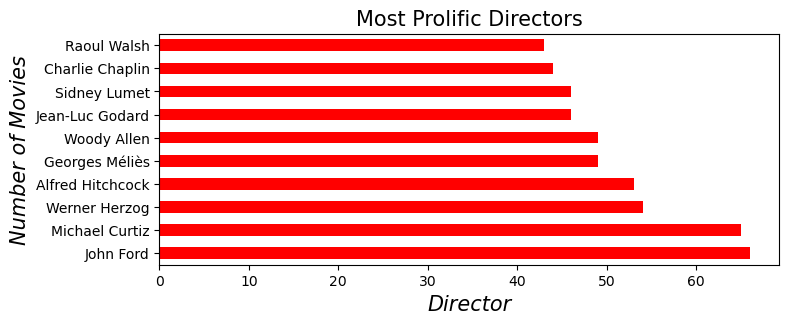

In [261]:
plt.figure(figsize = (8,3))
df.director.value_counts().head(10).plot(kind = 'barh', color = 'red')
plt.title('Most Prolific Directors', fontsize = 15)
plt.ylabel('Number of Movies', fontsize = 15, style = 'italic')
plt.xlabel('Director', fontsize = 15, style = 'italic')
plt.show()

##### Visualizing the top 10 blockbuster film directors in terms of gross revenue:

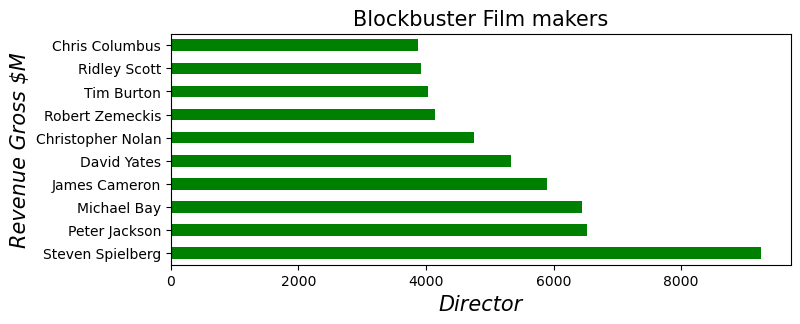

In [262]:
plt.figure(figsize = (8,3))
df.groupby('director').revenue_musd.sum().nlargest(10).plot(kind = 'barh', color = 'green')
plt.title('Blockbuster Film makers', fontsize = 15)
plt.ylabel('Revenue Gross $M', fontsize = 15, style = 'italic')
plt.xlabel('Director', fontsize = 15, style = 'italic')
plt.show()

#
#
#### Creating a directors dataframe similar to how one was created for franchises:

In [263]:
directors = df.groupby('director').agg({'title':'count',
                                       'vote_average':'mean',
                                       'vote_count':'sum'}).rename(columns = {'title':'no_of_titles',
                                                                             'vote_average':'average_rating',
                                                                             'vote_count':'no_of_votes'})

In [264]:
directors

,no_of_titles,average_rating,no_of_votes
director,,,
Dale Trevillion\t,2,4.000000,4.000000
Davide Manuli,1,6.900000,10.000000
E.W. Swackhamer,1,5.900000,5.000000
Vitaliy Vorobyov,1,5.500000,3.000000
Yeon Sang-Ho,4,6.600000,1039.000000
...,...,...,...
Ярополк Лапшин,1,10.000000,1.000000
پیمان معادی,1,6.000000,2.000000
塩谷 直義,1,7.200000,40.000000


##### Searching for the highest rated filmmakers:

In [265]:
directors[(directors['no_of_votes'] > 2000) & (directors['no_of_titles'] > 7)].nlargest(10, 'average_rating')

,no_of_titles,average_rating,no_of_votes
director,,,
Hayao Miyazaki,14,7.700000,14700.000000
Christopher Nolan,11,7.618182,67344.000000
Quentin Tarantino,10,7.490000,45910.000000
Wes Anderson,10,7.370000,11743.000000
David Fincher,10,7.350000,37588.000000
Park Chan-wook,9,7.311111,4532.000000
Akira Kurosawa,30,7.276667,3621.000000
Spike Jonze,13,7.270000,6665.000000
Paul Thomas Anderson,8,7.250000,5547.000000


##### Searching for the highest grossing filmmakers by genre:

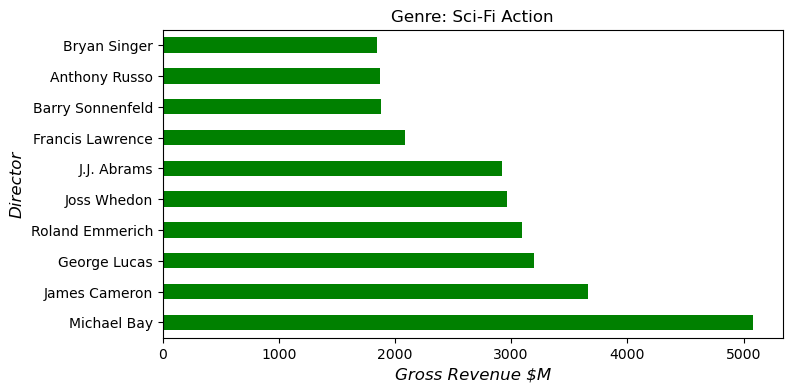

In [266]:
plt.figure(figsize = (8, 4))
df.loc[(df.genres.str.contains('Science Fiction'))
       & (df.genres.str.contains('Action'))].groupby('director').revenue_musd.sum().nlargest(10).plot(kind = 'barh', color = 'green')
plt.title('Genre: Sci-Fi Action')
plt.ylabel('Director', style = 'italic', fontsize =12)
plt.xlabel('Gross Revenue $M', style = 'italic', fontsize = 12)
plt.show()

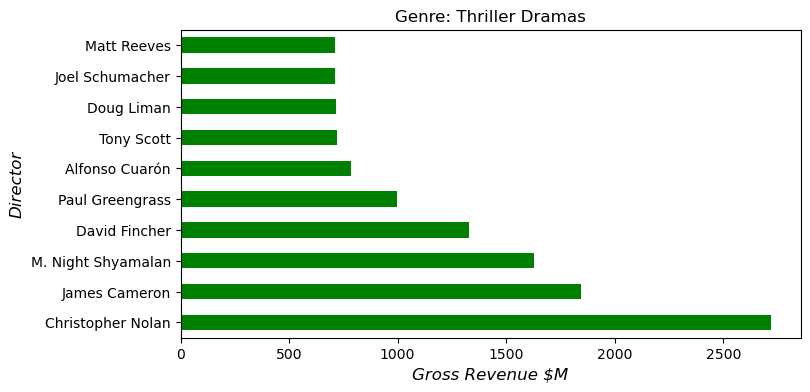

In [267]:
plt.figure(figsize = (8, 4))
df.loc[(df.genres.str.contains('Drama'))
       & (df.genres.str.contains('Thriller'))].groupby('director').revenue_musd.sum().nlargest(10).plot(kind = 'barh', color = 'green')
plt.title('Genre: Thriller Dramas')
plt.ylabel('Director', style = 'italic', fontsize =12)
plt.xlabel('Gross Revenue $M', style = 'italic', fontsize = 12)
plt.show()

### 15.2 - Film Scorers

In [269]:
scorers = df.groupby('musical_score').agg({'title':'count',
                                       'vote_average':'mean',
                                       'vote_count':'sum'}).rename(columns = {'title':'no_of_titles',
                                                                             'vote_average':'average_rating',
                                                                             'vote_count':'no_of_votes'})

In [270]:
scorers

,no_of_titles,average_rating,no_of_votes
musical_score,,,
A. R. Rahman,15,6.585714,479.000000
A.R. Rahman,3,6.333333,87.000000
A.W. Bullington,1,5.000000,1.000000
Aaron Copland,2,7.250000,10.000000
Aaron Dessner,1,6.100000,16.000000
...,...,...,...
Óscar Cardozo Ocampo,3,5.433333,29.000000
Óscar Maceda,1,5.600000,9.000000
Ülo Krigul,2,2.750000,12.000000


#### Visualizing the top 10 most Prolific musical score artists:

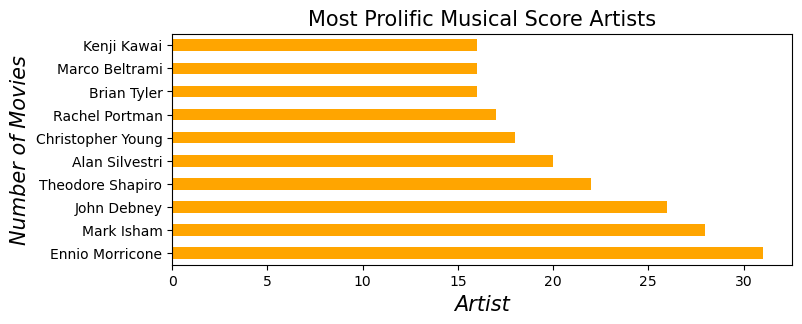

In [272]:
plt.figure(figsize = (8,3))
df.musical_score.value_counts().head(10).plot(kind = 'barh', color = 'orange')
plt.title('Most Prolific Musical Score Artists', fontsize = 15)
plt.ylabel('Number of Movies', fontsize = 15, style = 'italic')
plt.xlabel('Artist', fontsize = 15, style = 'italic')
plt.show()

##### Visualizing the top 10 musical score artists that contributed to the highest grossing films by revenue:

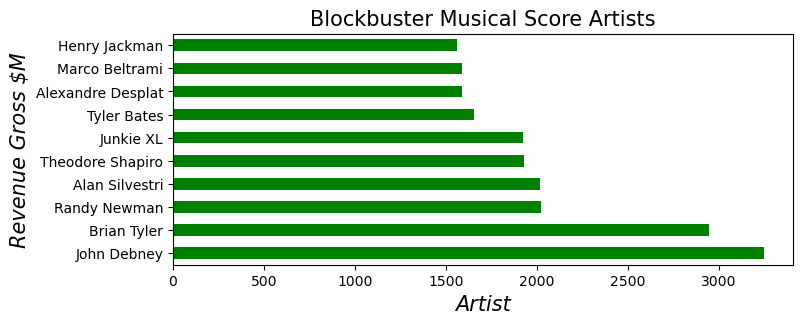

In [273]:
plt.figure(figsize = (8,3))
df.groupby('musical_score').revenue_musd.sum().nlargest(10).plot(kind = 'barh', color = 'green')
plt.title('Blockbuster Musical Score Artists', fontsize = 15)
plt.ylabel('Revenue Gross $M', fontsize = 15, style = 'italic')
plt.xlabel('Artist', fontsize = 15, style = 'italic')
plt.show()

##### Searching for the highest rated musical score artists:

In [274]:
scorers[(scorers['no_of_votes'] > 2000) & (scorers['no_of_titles'] > 7)].nlargest(10, 'average_rating')

,no_of_titles,average_rating,no_of_votes
musical_score,,,
Michael Giacchino,9,6.855556,13327.000000
Angelo Badalamenti,15,6.713333,3606.000000
Lorne Balfe,9,6.700000,2508.000000
Alexandre Desplat,13,6.684615,11147.000000
Mychael Danna,11,6.572727,8973.000000
Hans Zimmer,15,6.520000,10415.000000
Rachel Portman,17,6.447059,3469.000000
Dario Marianelli,8,6.412500,2779.000000
Howard Shore,11,6.409091,7214.000000


##### Searching for the highest grossing film score artists by genre:

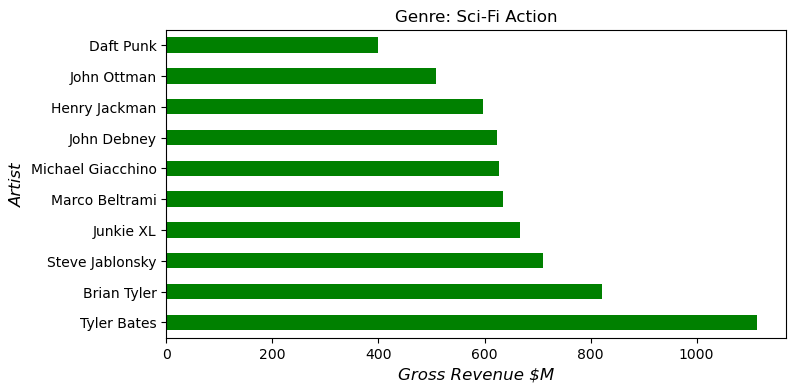

In [275]:
plt.figure(figsize = (8, 4))
df.loc[(df.genres.str.contains('Science Fiction'))
       & (df.genres.str.contains('Action'))].groupby('musical_score').revenue_musd.sum().nlargest(10).plot(kind = 'barh', color = 'green')
plt.title('Genre: Sci-Fi Action')
plt.ylabel('Artist', style = 'italic', fontsize =12)
plt.xlabel('Gross Revenue $M', style = 'italic', fontsize = 12)
plt.show()

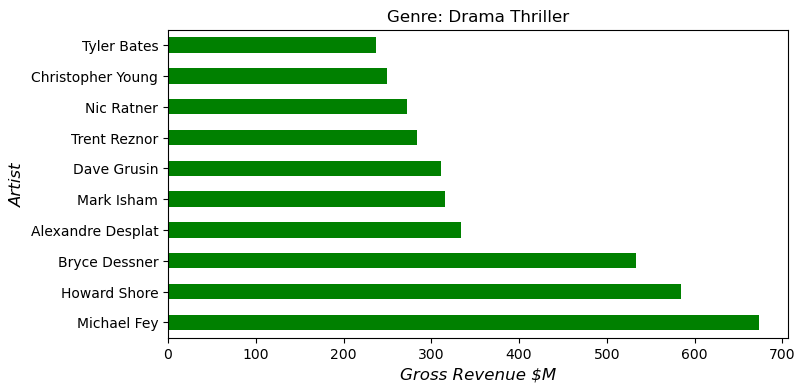

In [276]:
plt.figure(figsize = (8, 4))
df.loc[(df.genres.str.contains('Drama'))
       & (df.genres.str.contains('Thriller'))].groupby('musical_score').revenue_musd.sum().nlargest(10).plot(kind = 'barh', color = 'green')
plt.title('Genre: Drama Thriller')
plt.ylabel('Artist', style = 'italic', fontsize =12)
plt.xlabel('Gross Revenue $M', style = 'italic', fontsize = 12)
plt.show()

#
### 15.3 - Producers

In [277]:
producers = df.groupby('producer').agg({'title':'count',
                                       'vote_average':'mean',
                                       'vote_count':'sum'}).rename(columns = {'title':'no_of_titles',
                                                                             'vote_average':'average_rating',
                                                                             'vote_count':'no_of_votes'})

In [278]:
producers

,no_of_titles,average_rating,no_of_votes
producer,,,
A. D. Nast Jr.,1,4.000000,2.000000
A. John Graves,1,7.100000,156.000000
A. Kitman Ho,1,6.200000,115.000000
A. Michael Lieberman,1,5.000000,211.000000
Aaron Eckhart,1,5.900000,89.000000
...,...,...,...
Zygi Wilf,3,6.033333,56.000000
Álvaro Longoria,1,5.900000,36.000000
Álvaro Sáenz de Heredia,1,4.700000,6.000000


#### Visualizing the top 10 most active producers:`

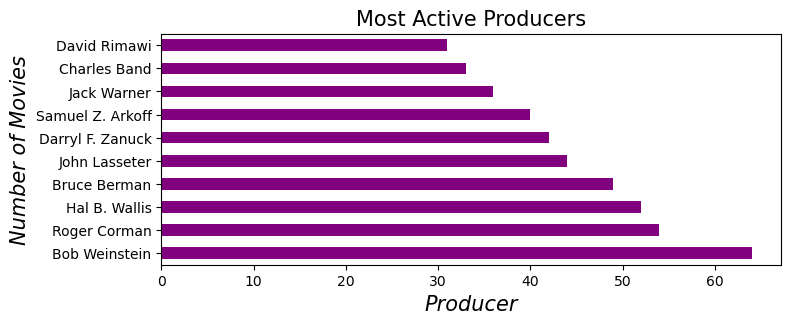

In [284]:
plt.figure(figsize = (8,3))
df.producer.value_counts().head(10).plot(kind = 'barh', color = 'purple')
plt.title('Most Active Producers', fontsize = 15)
plt.ylabel('Number of Movies', fontsize = 15, style = 'italic')
plt.xlabel('Producer', fontsize = 15, style = 'italic')
plt.show()

##### Searching for the highest rated Producers:

In [281]:
producers[(producers['no_of_votes'] > 2000) & (producers['no_of_titles'] > 7)].nlargest(10, 'average_rating')

,no_of_titles,average_rating,no_of_votes
producer,,,
Yasuyoshi Tokuma,9,7.522222,9326.000000
John Lasseter,44,7.220455,78932.000000
Charles H. Joffe,14,6.971429,2171.000000
Jake Eberts,9,6.922222,4058.000000
Todd Hallowell,10,6.920000,20737.000000
Michael Uslan,24,6.870833,40580.000000
George Lucas,19,6.805263,41501.000000
Tessa Ross,21,6.757143,22507.000000
Christine Langan,8,6.737500,3347.000000


##### Searching for the highest grossing film score artists by genre:

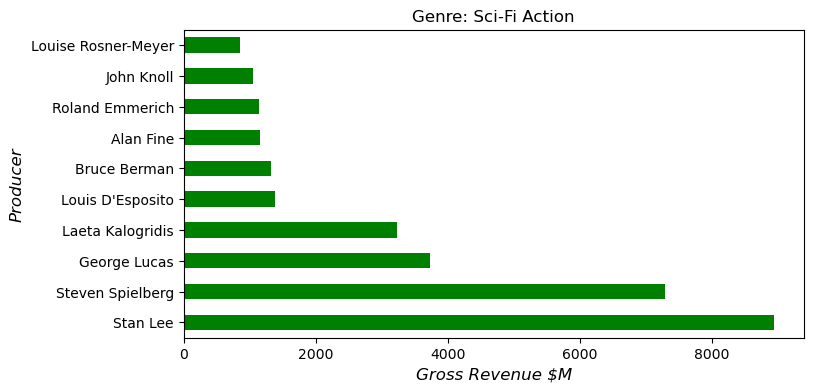

In [282]:
plt.figure(figsize = (8, 4))
df.loc[(df.genres.str.contains('Science Fiction'))
       & (df.genres.str.contains('Action'))].groupby('producer').revenue_musd.sum().nlargest(10).plot(kind = 'barh', color = 'green')
plt.title('Genre: Sci-Fi Action')
plt.ylabel('Producer', style = 'italic', fontsize =12)
plt.xlabel('Gross Revenue $M', style = 'italic', fontsize = 12)
plt.show()

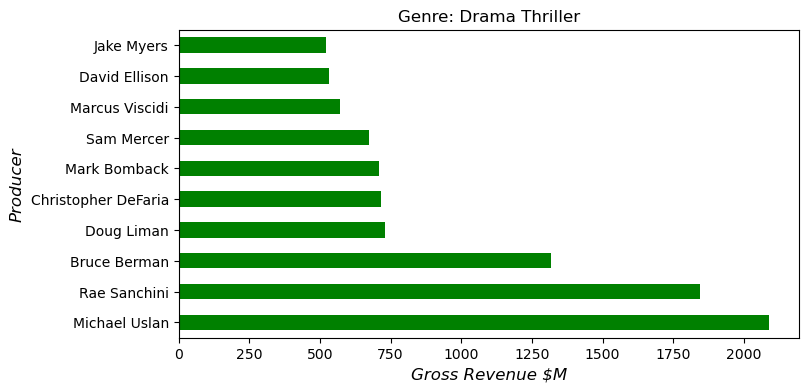

In [283]:
plt.figure(figsize = (8, 4))
df.loc[(df.genres.str.contains('Drama'))
       & (df.genres.str.contains('Thriller'))].groupby('producer').revenue_musd.sum().nlargest(10).plot(kind = 'barh', color = 'green')
plt.title('Genre: Drama Thriller')
plt.ylabel('Producer', style = 'italic', fontsize =12)
plt.xlabel('Gross Revenue $M', style = 'italic', fontsize = 12)
plt.show()